# EDA for the data cleanning

The first step is to look for inconsistencies in the data like; inconsistencies in the column names, outliers, 
NAN values, etc.

In [63]:
# Libraries
import pandas as pd

# Loading the dataset
data = pd.read_csv('tabla.csv', sep=';')
print(data.shape)
print(data.head())

(123193, 27)
       # Código de cliente/proveedor            vendedor  \
0  19242                  C821003143  OMAR GIL Y DIOMARY   
1  19243                  C821003143  OMAR GIL Y DIOMARY   
2  19245                  C821003143  OMAR GIL Y DIOMARY   
3  19246                  C821003143  OMAR GIL Y DIOMARY   
4  19247                  C821003143  OMAR GIL Y DIOMARY   

                         Nombre de cliente/proveedor  FA    mes   año  \
0  HOSPITAL DEPARTAMENTAL CENTENARIO DE SEVILLA E...   1  marzo  2016   
1  HOSPITAL DEPARTAMENTAL CENTENARIO DE SEVILLA E...   1  marzo  2016   
2  HOSPITAL DEPARTAMENTAL CENTENARIO DE SEVILLA E...   1  marzo  2016   
3  HOSPITAL DEPARTAMENTAL CENTENARIO DE SEVILLA E...   1  marzo  2016   
4  HOSPITAL DEPARTAMENTAL CENTENARIO DE SEVILLA E...   1  marzo  2016   

  Fecha de contabilización Total bruto Ingreso bruto línea       ...         \
0               28/03/2016          30                   0       ...          
1               28/03/2016   

### Checking the column names of the data

In [64]:
print(data.columns)

Index(['#', 'Código de cliente/proveedor', 'vendedor',
       'Nombre de cliente/proveedor', 'FA', 'mes', 'año',
       'Fecha de contabilización', 'Total bruto', 'Ingreso bruto línea',
       'Cantidad FA', 'Número de artículo', 'codigo padre', 'codigo padre.1',
       'tipo insumo', 'Descripcion unión', 'Descripción del artículo',
       'ID interno de documento', 'NC', 'Fecha de contabilización.1',
       'Cantidad NC', 'Total bruto.1', 'Ingreso bruto línea.1', 'CUM',
       'tipo cliente juan', 'tipo cliente juan.1', 'ABC ADJUDICACION'],
      dtype='object')


### Changing the column names

In [65]:
import re

# Function to normalize the column names
def normalize_names():
    names = []
    for name in data.columns:
        name = name.lower()
        name = re.sub(' ', '_', name)
        name = re.sub('/', '_', name)
        name = re.sub('\.', '_', name)
        name = re.sub('á', 'a', name)
        name = re.sub('é', 'e', name)
        name = re.sub('í', 'i', name)
        name = re.sub('ó', 'o', name)
        name = re.sub('ú', 'u', name)
        names.append(name)
    return names
        
data.columns = normalize_names()    
print(data.columns)

Index(['#', 'codigo_de_cliente_proveedor', 'vendedor',
       'nombre_de_cliente_proveedor', 'fa', 'mes', 'año',
       'fecha_de_contabilizacion', 'total_bruto', 'ingreso_bruto_linea',
       'cantidad_fa', 'numero_de_articulo', 'codigo_padre', 'codigo_padre_1',
       'tipo_insumo', 'descripcion_union', 'descripcion_del_articulo',
       'id_interno_de_documento', 'nc', 'fecha_de_contabilizacion_1',
       'cantidad_nc', 'total_bruto_1', 'ingreso_bruto_linea_1', 'cum',
       'tipo_cliente_juan', 'tipo_cliente_juan_1', 'abc_adjudicacion'],
      dtype='object')


The following columns must be eliminated from the dataframe: #, mes, año, numero_de_articulo, codigo_padre, codigo_padre_1, descripcion_union, id_interno_de_documento, nc (this column has many null values and not it recomended), fecha_de_contabilizacion_1 (has many null values), cantidad_nc, total_bruto_1 (has many null values), ingreso_bruto_linea_1 (has many null values)

### Eliminating the columns that are not necesary

In [66]:
data = data.drop(['#', 'numero_de_articulo', 'codigo_padre', 'codigo_padre_1', 'descripcion_union', 
                 'id_interno_de_documento', 'nc', 'fecha_de_contabilizacion_1', 'cantidad_nc', 'total_bruto_1', 
                 'ingreso_bruto_linea_1'], axis=1)
print(data.columns)
print(data.shape)

Index(['codigo_de_cliente_proveedor', 'vendedor',
       'nombre_de_cliente_proveedor', 'fa', 'mes', 'año',
       'fecha_de_contabilizacion', 'total_bruto', 'ingreso_bruto_linea',
       'cantidad_fa', 'tipo_insumo', 'descripcion_del_articulo', 'cum',
       'tipo_cliente_juan', 'tipo_cliente_juan_1', 'abc_adjudicacion'],
      dtype='object')
(123193, 16)


### Checking the data types 

In [67]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123193 entries, 0 to 123192
Data columns (total 16 columns):
codigo_de_cliente_proveedor    123193 non-null object
vendedor                       123193 non-null object
nombre_de_cliente_proveedor    123193 non-null object
fa                             123193 non-null int64
mes                            123193 non-null object
año                            123193 non-null int64
fecha_de_contabilizacion       123193 non-null object
total_bruto                    123193 non-null object
ingreso_bruto_linea            123193 non-null object
cantidad_fa                    123193 non-null int64
tipo_insumo                    123038 non-null float64
descripcion_del_articulo       123142 non-null object
cum                            100011 non-null object
tipo_cliente_juan              123193 non-null int64
tipo_cliente_juan_1            123193 non-null object
abc_adjudicacion               117596 non-null object
dtypes: float64(1), int64(4)

total bruto should be float64, ingreso_linea_bruto should be float64, fecha_de_contabilizacion should be a datetime object, 
cum should be float64, tipo_cliente_juan should be a category, tipo_cliente_juan_1 should be a category and tipo_insumo should be a category


### Changing the data types

In [68]:
def cambiocomapunto(nombre):
    num = []
    for numero in data[nombre]:
        numero = re.sub(',', '.', numero)
        num.append(numero)
    return num

data['ingreso_bruto_linea'] = cambiocomapunto('ingreso_bruto_linea') 
data['total_bruto'] = cambiocomapunto('total_bruto')

s = pd.Series(data["total_bruto"])
data["total_bruto"]= pd.to_numeric(s)

data.fecha_de_contabilizacion = pd.to_datetime(data.fecha_de_contabilizacion, format='%d/%m/%Y')

s = pd.Series(data["tipo_insumo"])
data["tipo_insumo"]= pd.to_numeric(s).astype('category')

s = pd.Series(data["ingreso_bruto_linea"])
data["ingreso_bruto_linea"]= pd.to_numeric(s)

data['tipo_cliente_juan'] = data['tipo_cliente_juan'].astype('category')
data['tipo_cliente_juan_1'] = data['tipo_cliente_juan_1'].astype('category')


print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123193 entries, 0 to 123192
Data columns (total 16 columns):
codigo_de_cliente_proveedor    123193 non-null object
vendedor                       123193 non-null object
nombre_de_cliente_proveedor    123193 non-null object
fa                             123193 non-null int64
mes                            123193 non-null object
año                            123193 non-null int64
fecha_de_contabilizacion       123193 non-null datetime64[ns]
total_bruto                    123193 non-null float64
ingreso_bruto_linea            123193 non-null float64
cantidad_fa                    123193 non-null int64
tipo_insumo                    123038 non-null category
descripcion_del_articulo       123142 non-null object
cum                            100011 non-null object
tipo_cliente_juan              123193 non-null category
tipo_cliente_juan_1            123193 non-null category
abc_adjudicacion               117596 non-null object
dtypes: cate

### Changing the index of the DataFrame to be a datetime

In [69]:
data.index = data.fecha_de_contabilizacion
data = data.drop(['fecha_de_contabilizacion'], axis=1)
print(data.shape)
print(data.head())
print('\n\n\n')
print(data.tail())

(123193, 15)
                         codigo_de_cliente_proveedor            vendedor  \
fecha_de_contabilizacion                                                   
2016-03-28                                C821003143  OMAR GIL Y DIOMARY   
2016-03-28                                C821003143  OMAR GIL Y DIOMARY   
2016-03-28                                C821003143  OMAR GIL Y DIOMARY   
2016-03-28                                C821003143  OMAR GIL Y DIOMARY   
2016-03-28                                C821003143  OMAR GIL Y DIOMARY   

                                                nombre_de_cliente_proveedor  \
fecha_de_contabilizacion                                                      
2016-03-28                HOSPITAL DEPARTAMENTAL CENTENARIO DE SEVILLA E...   
2016-03-28                HOSPITAL DEPARTAMENTAL CENTENARIO DE SEVILLA E...   
2016-03-28                HOSPITAL DEPARTAMENTAL CENTENARIO DE SEVILLA E...   
2016-03-28                HOSPITAL DEPARTAMENTAL CENTENARIO

## Seeing the values of the columns  

### Seeing the values of vendedor

In [70]:
print(data.vendedor.value_counts())

ALEX PEÑA Y CLAUDIA      49938
JUAN CARLOS Y GLORIA     26592
OMAR GIL y GLORIA        12348
ALEX PEÑA Y DIOMARY       9140
JUAN CARLOS Y CLAUDIA     7479
ALEX PEÑA Y GLORIA        5670
DIOMARY                   5083
OMAR GIL Y DIOMARY        3063
JUAN CARLOS Y DIOMARY     2498
JUAN CARLOS               1149
ALEX Y CLAUDIA             117
MARIA E                    115
CONCESIONARIO                1
Name: vendedor, dtype: int64


the names in vendedor are joined in a single string and separated by Y, the names should be separated in a list for a best procesing. Example: 'OMAR GIL Y DIOMARY' must be ['OMAR GIL', 'DIOMARY'] 

In [71]:
import re

re_vendedor = r'\sy?Y?\s'
data.vendedor = data.vendedor.apply(lambda n: re.split(re_vendedor, n))
print(data.vendedor.value_counts())

[ALEX PEÑA, CLAUDIA]      49938
[JUAN CARLOS, GLORIA]     26592
[OMAR GIL, GLORIA]        12348
[ALEX PEÑA, DIOMARY]       9140
[JUAN CARLOS, CLAUDIA]     7479
[ALEX PEÑA, GLORIA]        5670
[DIOMARY]                  5083
[OMAR GIL, DIOMARY]        3063
[JUAN CARLOS, DIOMARY]     2498
[JUAN CARLOS]              1149
[ALEX, CLAUDIA]             117
[MARIA E]                   115
[CONCESIONARIO]               1
Name: vendedor, dtype: int64


In [72]:
def list_value_counts(list_names):
    for name in list_names:
        if name in counts:
            counts[name] += 1
        else:
            counts[name] = 1

counts = {}
data.vendedor.apply(lambda list: list_value_counts(list))
result = pd.DataFrame(list(counts.items()))
result.sort_values(by=1, ascending=False, inplace=True)
print(result)

               0      1
2      ALEX PEÑA  64748
3        CLAUDIA  57534
5         GLORIA  44610
4    JUAN CARLOS  37718
1        DIOMARY  19784
0       OMAR GIL  15411
7           ALEX    117
8        MARIA E    115
6  CONCESIONARIO      1


### Seeing the values of nombre_de_cliente_proveedor

In [73]:
print(data.nombre_de_cliente_proveedor.value_counts())

ESE HOSPITAL SAN FELIX DE LA DORADA                                    11931
RED SALUD ARMENIA EMPRESA SOCIAL DEL ESTADO E.S.E.                     10805
HOSPITAL DEPARTAMENTAL SANTA SOFIA DE CALDAS                            4580
ESE HOSPITAL SAN JOSE DE VITERBO                                        4090
ESE HOSPITAL SAN JOSE DE AGUADAS                                        3808
ESE HOSPITAL SAN LORENZO DE SUPIA                                       3669
HOSPITAL DEPARTAMENTA SAN ANTONIO DE MARMATO ESE                        3483
ESE HOSPITAL SANTA ANA DE PIJAO                                         3173
HOSPITAL DEPARTAMENTAL CENTENARIO DE SEVILLA E.S.E                      3063
MEDICCOL S.A.S                                                          2661
ESE HOSPITAL SAGRADO CORAZON DE JESUS DE QUIMBAYA                       2498
ESE HOSPITAL LA MISERICORDIA DE CALARCA                                 2466
ESE HOSPITAL SAN VICENTE DE PAUL DE FILANDIA                            2419

# Most selled items 

In [100]:
print(data.descripcion_del_articulo.value_counts()[0:5])

SODIO CLORURO 0,9 % SOLUCION INYECTABLE BOLSA PVC 500 ml (BAXTER)    1053
ACETAMINOFEN 500 mg TABLETA (AG)                                      868
ACIDO ACETILSALICILICO 100 mg TABLETA (GENFAR)                        804
HIDROCLOROTIAZIDA 25 mg TABLETA (TECNOQUIMICAS)                       698
DICLOFENACO SÓDICO 75 mg/3 ml SOLUCION INYECTABLE (VITALIS)           682
Name: descripcion_del_articulo, dtype: int64



## Seeing insights ot the top 1 item

1
venta máxima:  8586700.0 venta mínima:  512.4
                                      vendedor  \
fecha_de_contabilizacion                         
2016-01-30                [ALEX PEÑA, CLAUDIA]   

                                  nombre_de_cliente_proveedor  total_bruto  
fecha_de_contabilizacion                                                    
2016-01-30                ESE HOSPITAL SAN FELIX DE LA DORADA    8586700.0  


                                      vendedor  \
fecha_de_contabilizacion                         
2016-01-29                [ALEX PEÑA, CLAUDIA]   

                                 nombre_de_cliente_proveedor  total_bruto  
fecha_de_contabilizacion                                                   
2016-01-29                ESE HOSPITAL SAN SIMON DE VICTORIA        512.4  



2
venta máxima:  10642756.0 venta mínima:  10578.0
                                      vendedor  \
fecha_de_contabilizacion                         
2016-02-12                [ALEX PEÑ

                                       vendedor  \
fecha_de_contabilizacion                          
2016-12-19                [JUAN CARLOS, GLORIA]   

                                                nombre_de_cliente_proveedor  \
fecha_de_contabilizacion                                                      
2016-12-19                RED SALUD ARMENIA EMPRESA SOCIAL DEL ESTADO E....   

                          total_bruto  
fecha_de_contabilizacion               
2016-12-19                  7044000.0  


                           vendedor  nombre_de_cliente_proveedor  total_bruto
fecha_de_contabilizacion                                                     
2016-12-05                [DIOMARY]  VALENCIA ALVAREZ JOHN JAIRO       1469.0



1
venta máxima:  7197000.0 venta mínima:  5584.0
                                      vendedor  \
fecha_de_contabilizacion                         
2017-01-16                [ALEX PEÑA, CLAUDIA]   

                                  nombre_de_clien

C:\Users\aleja\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


                                      vendedor  \
fecha_de_contabilizacion                         
2016-04-04                [ALEX PEÑA, CLAUDIA]   

                                            nombre_de_cliente_proveedor  \
fecha_de_contabilizacion                                                  
2016-04-04                ESE HOSPITAL SAN VICENTE DE PAUL DE  ARANZAZU   

                          total_bruto  
fecha_de_contabilizacion               
2016-04-04                   953736.0  


                           vendedor nombre_de_cliente_proveedor  total_bruto
fecha_de_contabilizacion                                                    
2016-04-28                [DIOMARY]     ESCOBAR LOTERO MAURICIO        132.1



5
venta máxima:  201388.0 venta mínima:  216.0
                                      vendedor  \
fecha_de_contabilizacion                         
2016-05-24                [ALEX PEÑA, CLAUDIA]   

                                               nombre_de_cliente_prov

                                      vendedor  \
fecha_de_contabilizacion                         
2017-02-10                [ALEX PEÑA, DIOMARY]   

                                                nombre_de_cliente_proveedor  \
fecha_de_contabilizacion                                                      
2017-02-10                HOSPITAL DEPARTAMENTAL SAN JUAN DE DIOS DE RIO...   

                          total_bruto  
fecha_de_contabilizacion               
2017-02-10                  3060000.0  


                           vendedor      nombre_de_cliente_proveedor  \
fecha_de_contabilizacion                                               
2017-02-07                [DIOMARY]  PUERTA MARQUEZ ANGELA FRANCISCA   

                          total_bruto  
fecha_de_contabilizacion               
2017-02-07                      420.0  



3
venta máxima:  700000.0 venta mínima:  380.0
                                      vendedor  \
fecha_de_contabilizacion                         
20

venta máxima:  810000.0 venta mínima:  90.0
                                       vendedor  \
fecha_de_contabilizacion                          
2016-08-08                [JUAN CARLOS, GLORIA]   

                                        nombre_de_cliente_proveedor  \
fecha_de_contabilizacion                                              
2016-08-08                HOSPITAL SAN VICENTE E.S.E. DE MONTENEGRO   

                          total_bruto  
fecha_de_contabilizacion               
2016-08-08                   810000.0  


                                      vendedor  \
fecha_de_contabilizacion                         
2016-08-31                [ALEX PEÑA, CLAUDIA]   

                                  nombre_de_cliente_proveedor  total_bruto  
fecha_de_contabilizacion                                                    
2016-08-31                ESE HOSPITAL SAN FELIX DE LA DORADA         90.0  



9
venta máxima:  720000.0 venta mínima:  450.0
                                  

1
venta máxima:  72000.0 venta mínima:  341.0
                                      vendedor  \
fecha_de_contabilizacion                         
2016-01-20                [ALEX PEÑA, CLAUDIA]   

                                        nombre_de_cliente_proveedor  \
fecha_de_contabilizacion                                              
2016-01-20                E.S.E. HOSPITAL SAN ANTONIO DE MANZANARES   

                          total_bruto  
fecha_de_contabilizacion               
2016-01-20                    72000.0  


                                      vendedor  \
fecha_de_contabilizacion                         
2016-01-29                [ALEX PEÑA, CLAUDIA]   

                                  nombre_de_cliente_proveedor  total_bruto  
fecha_de_contabilizacion                                                    
2016-01-29                ESE HOSPITAL SAN FELIX DE LA DORADA        341.0  



2
venta máxima:  9244200.0 venta mínima:  320.0
                                  

                                     vendedor nombre_de_cliente_proveedor  \
fecha_de_contabilizacion                                                    
2016-11-22                [ALEX PEÑA, GLORIA]               DCOLFARMA SAS   
2016-11-30                [ALEX PEÑA, GLORIA]               DCOLFARMA SAS   

                          total_bruto  
fecha_de_contabilizacion               
2016-11-22                  1201536.0  
2016-11-30                  1201536.0  


                                     vendedor nombre_de_cliente_proveedor  \
fecha_de_contabilizacion                                                    
2016-11-03                [ALEX PEÑA, GLORIA]              UCIKIDS S.A.S.   

                          total_bruto  
fecha_de_contabilizacion               
2016-11-03                      189.0  



12
venta máxima:  338688.0 venta mínima:  336.0
                                      vendedor  \
fecha_de_contabilizacion                         
2016-12-02                

                           vendedor    nombre_de_cliente_proveedor  \
fecha_de_contabilizacion                                             
2016-05-17                [DIOMARY]  OSORIO RESTREPO GLORIA PIEDAD   

                          total_bruto  
fecha_de_contabilizacion               
2016-05-17                      775.0  



6
venta máxima:  483000.0 venta mínima:  153.0
                                      vendedor  \
fecha_de_contabilizacion                         
2016-06-11                [ALEX PEÑA, DIOMARY]   

                                                nombre_de_cliente_proveedor  \
fecha_de_contabilizacion                                                      
2016-06-11                HOSPITAL DEPARTAMENTAL SAN JUAN DE DIOS DE RIO...   

                          total_bruto  
fecha_de_contabilizacion               
2016-06-11                   483000.0  


                           vendedor   nombre_de_cliente_proveedor  total_bruto
fecha_de_contabilizacion     

venta máxima:  45150.0 venta mínima:  7800.0
                                      vendedor  \
fecha_de_contabilizacion                         
2017-04-28                [ALEX PEÑA, DIOMARY]   

                               nombre_de_cliente_proveedor  total_bruto  
fecha_de_contabilizacion                                                 
2017-04-28                ESE HOSPITAL SAN JOSE DE VITERBO      45150.0  


                                      vendedor  \
fecha_de_contabilizacion                         
2017-04-22                [ALEX PEÑA, CLAUDIA]   

                                                nombre_de_cliente_proveedor  \
fecha_de_contabilizacion                                                      
2017-04-22                HOSPITAL DEPARTAMENTAL SAN JOSE DE MARULANDA C...   

                          total_bruto  
fecha_de_contabilizacion               
2017-04-22                     7800.0  



5
venta máxima:  47360.0 venta mínima:  47360.0
                    

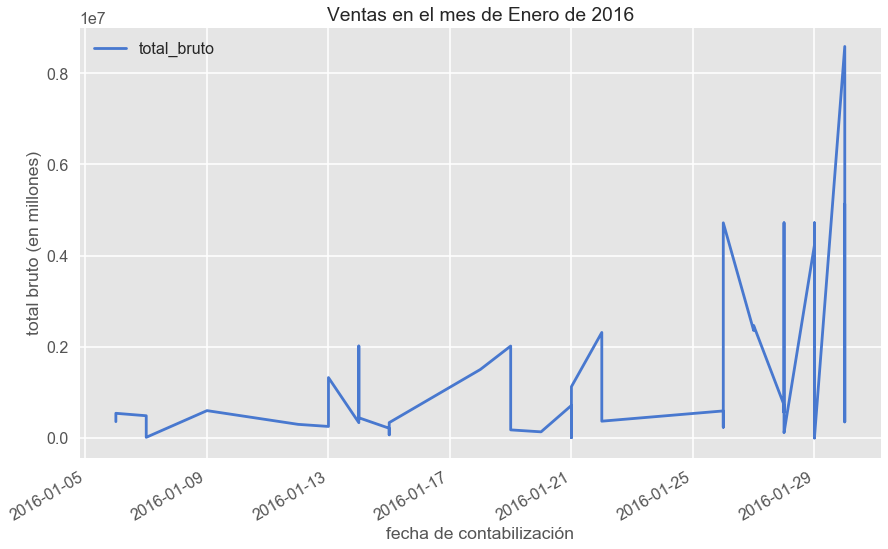

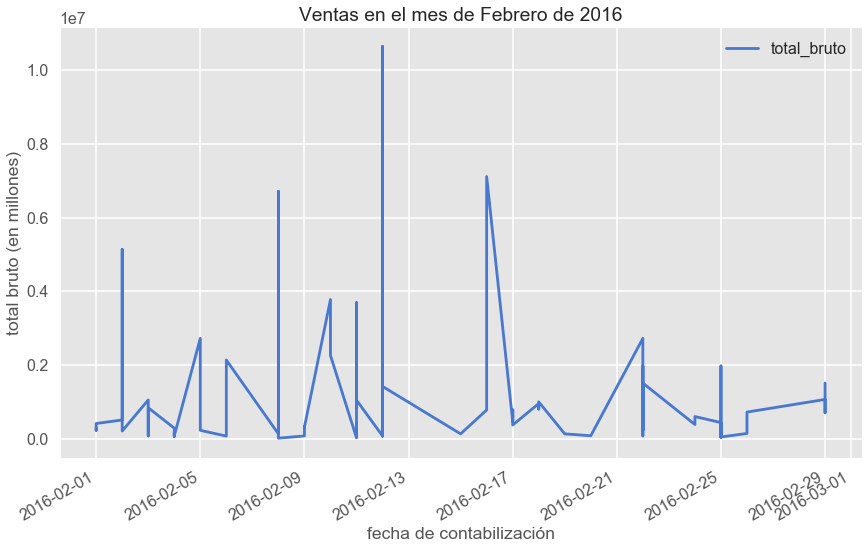

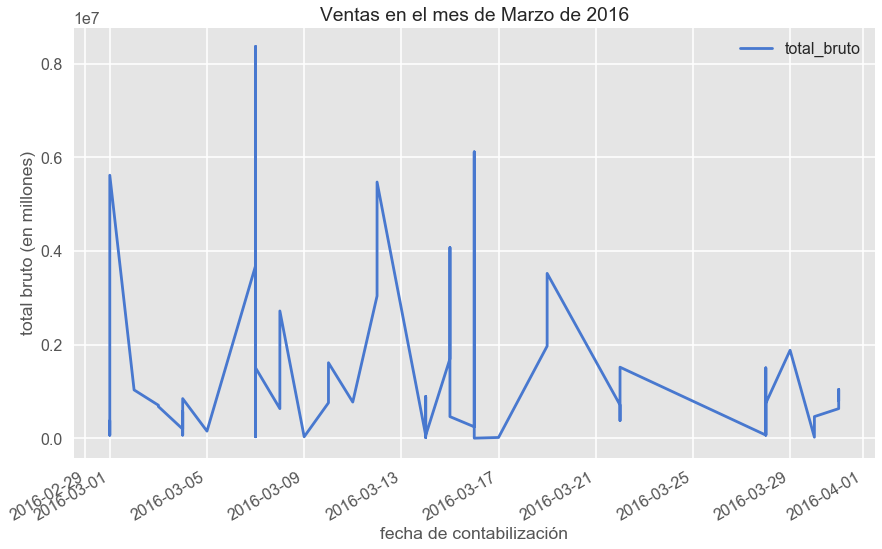

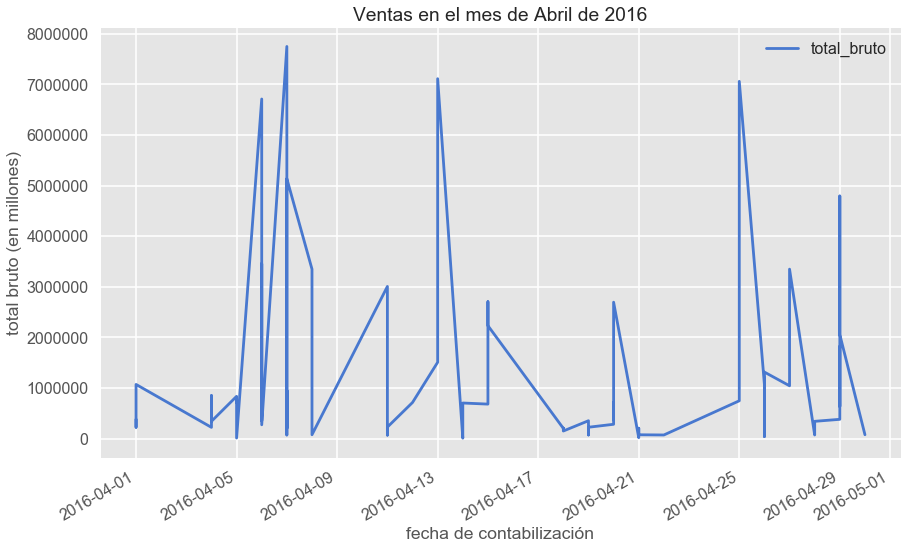

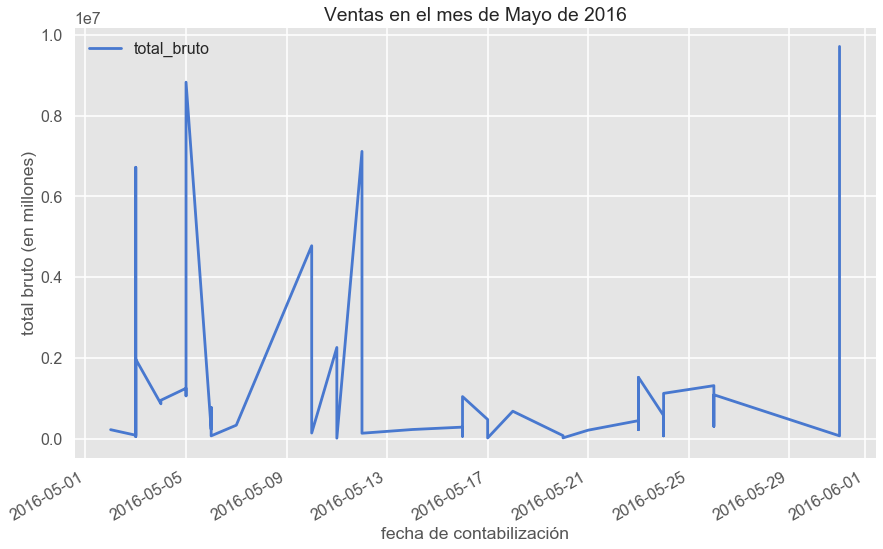

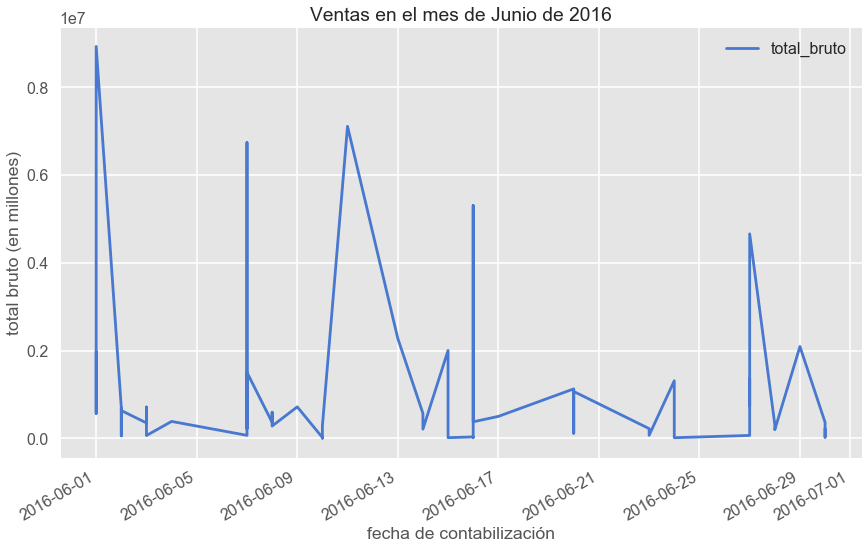

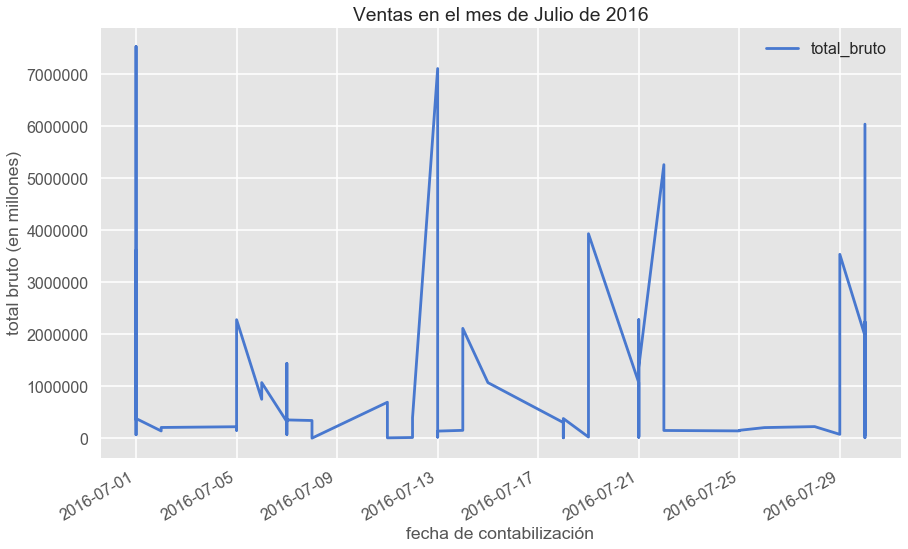

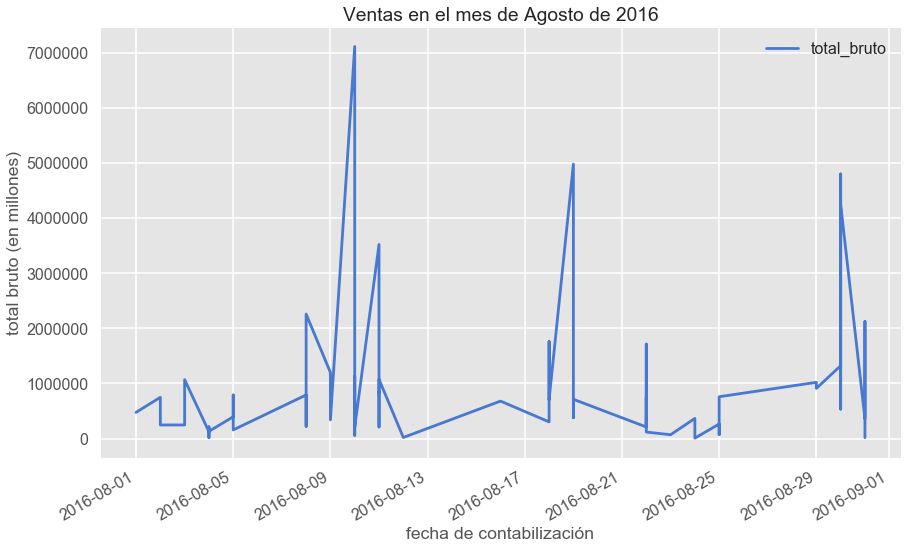

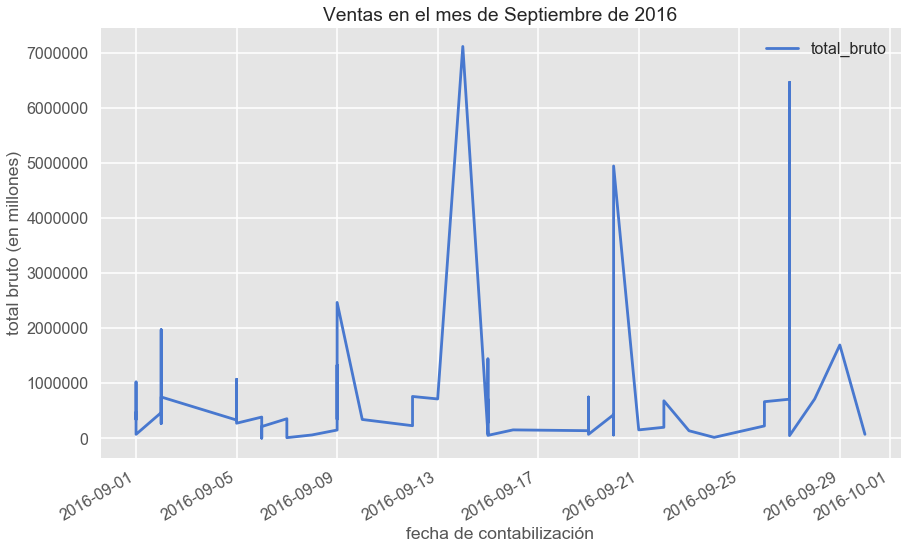

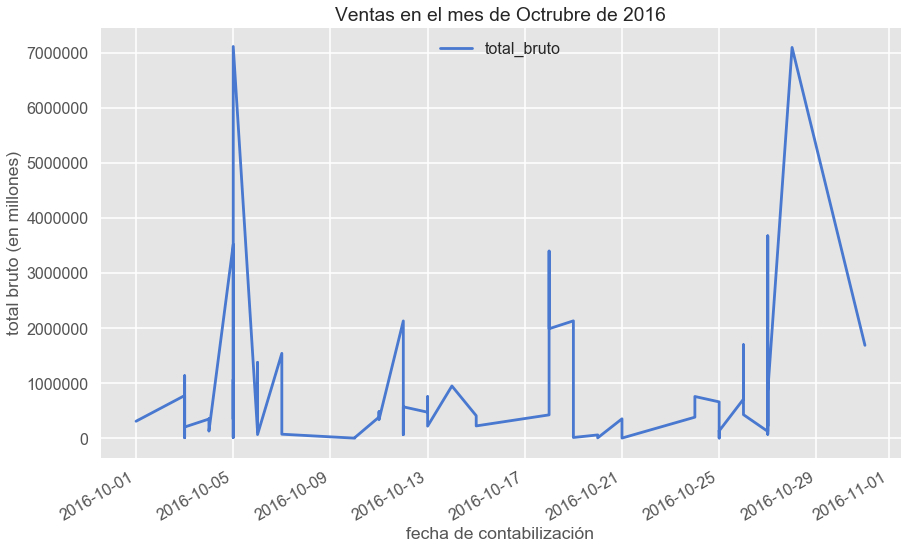

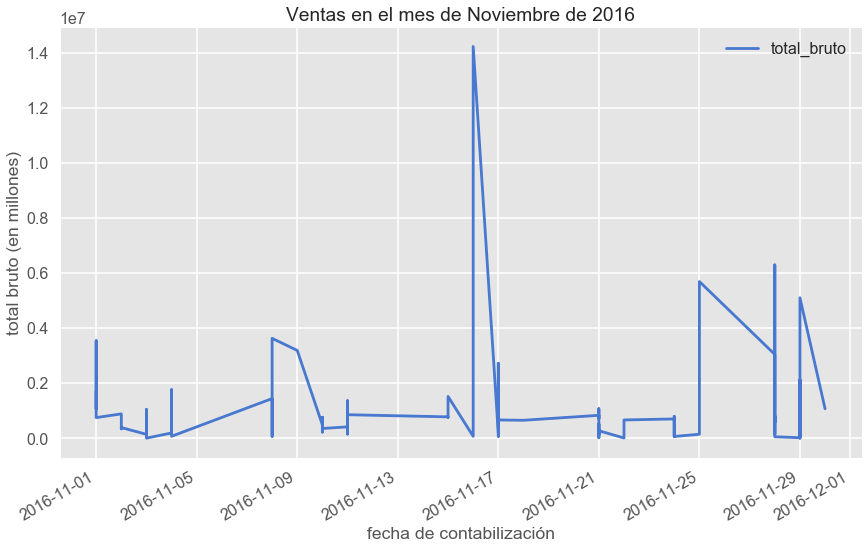

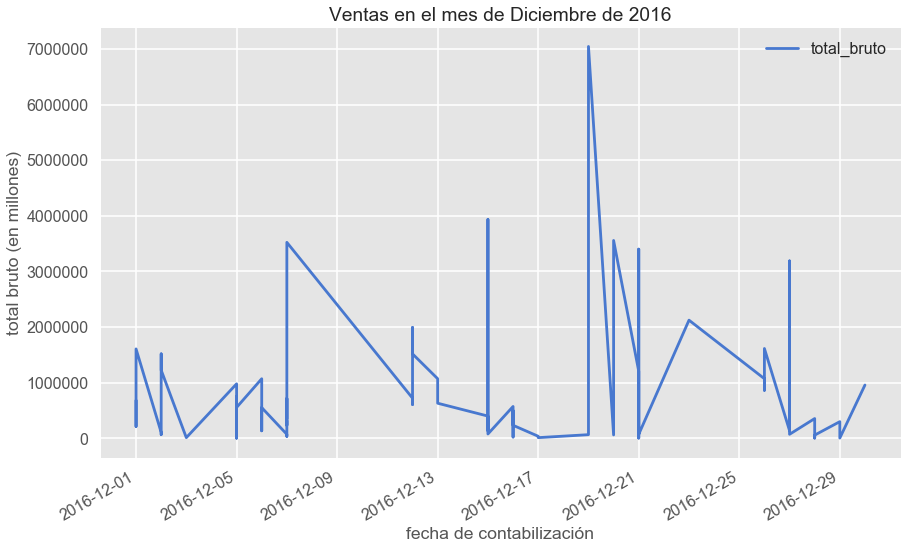

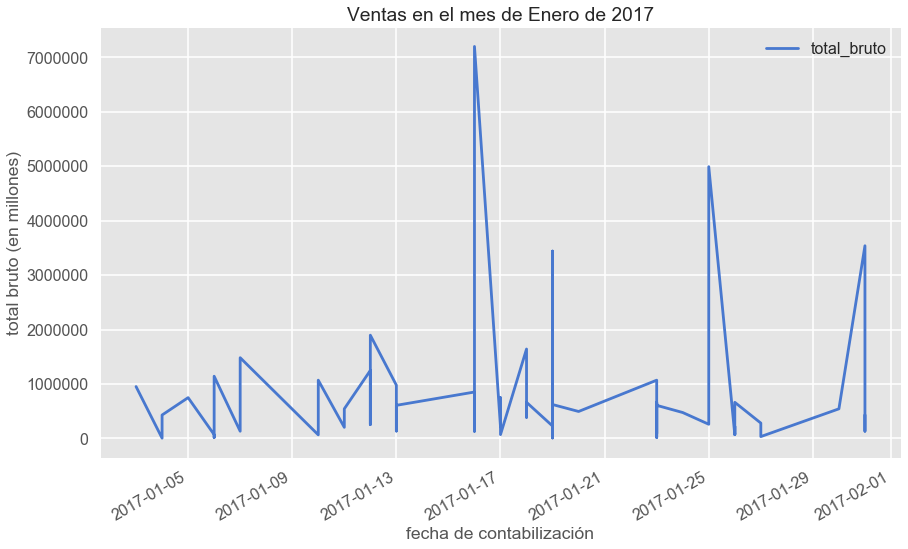

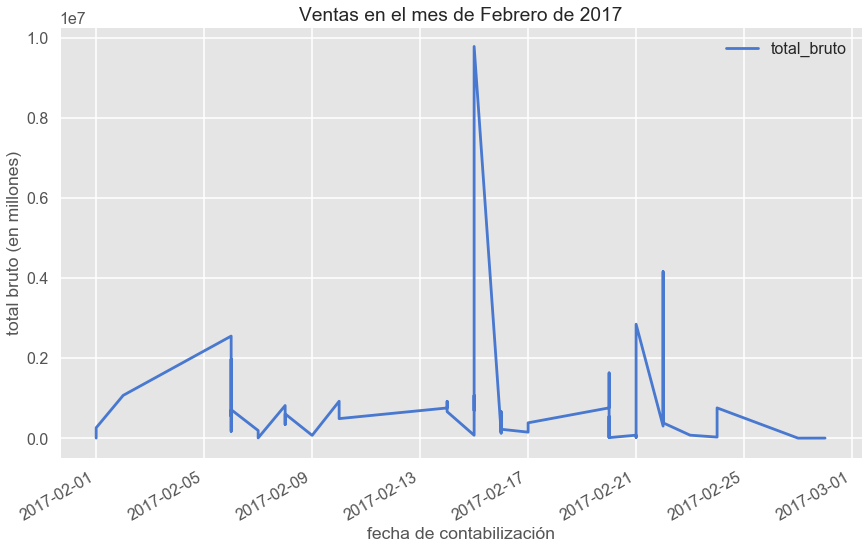

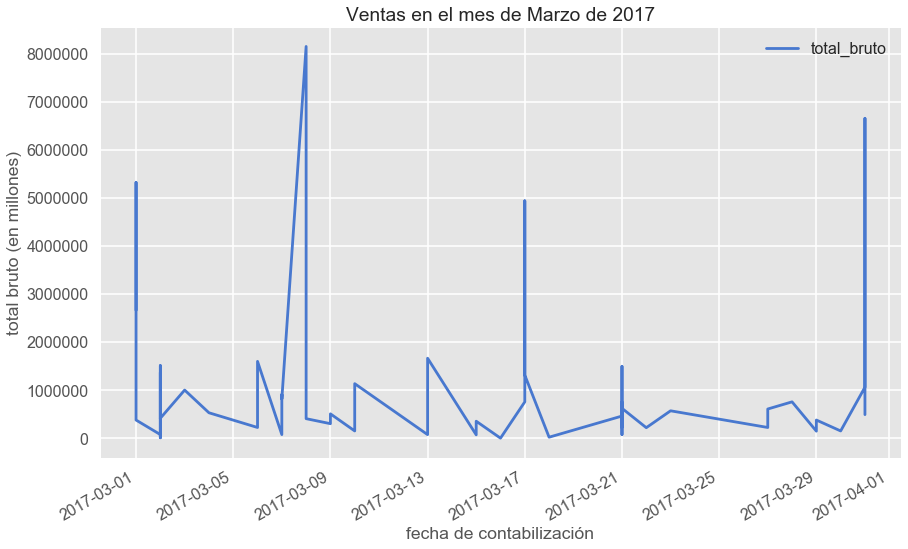

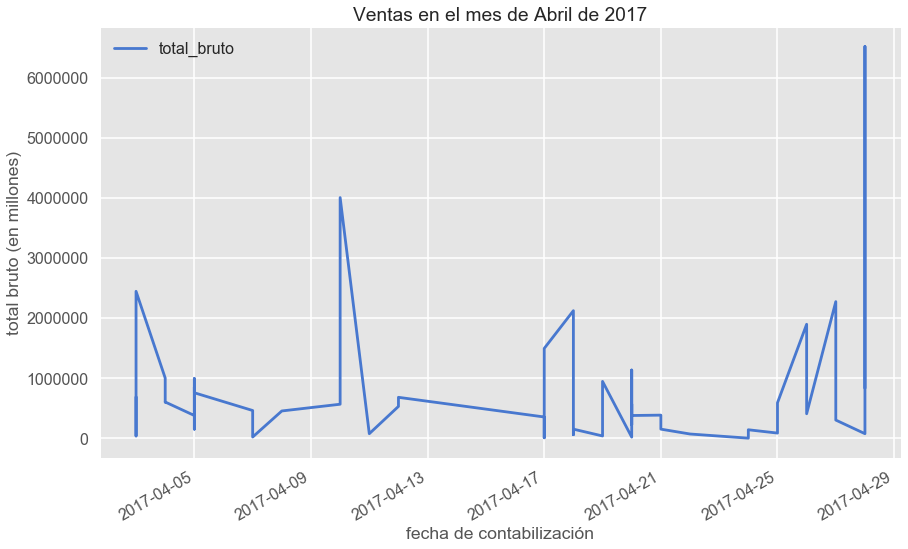

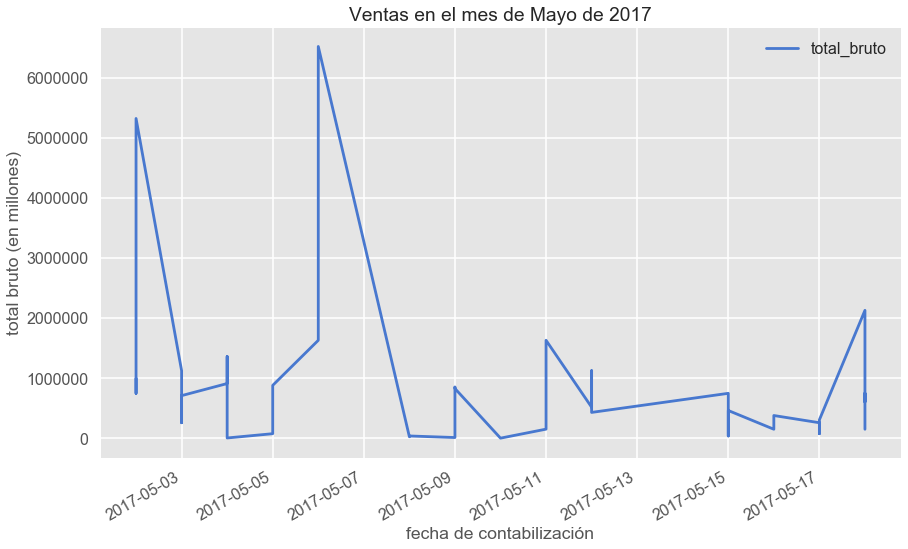

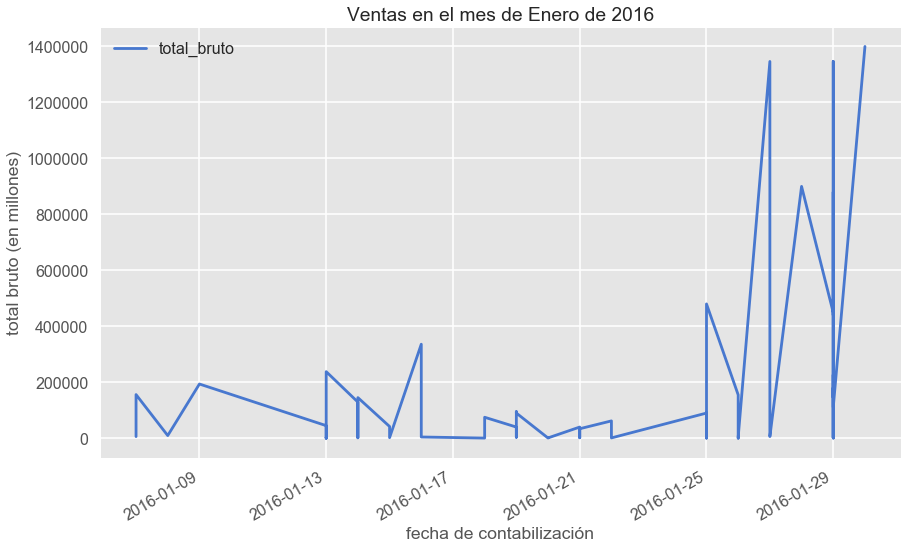

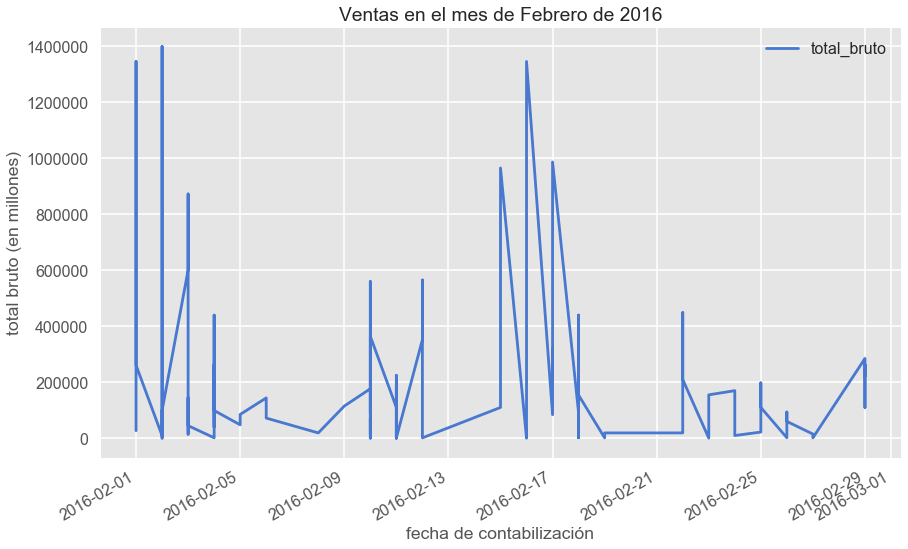

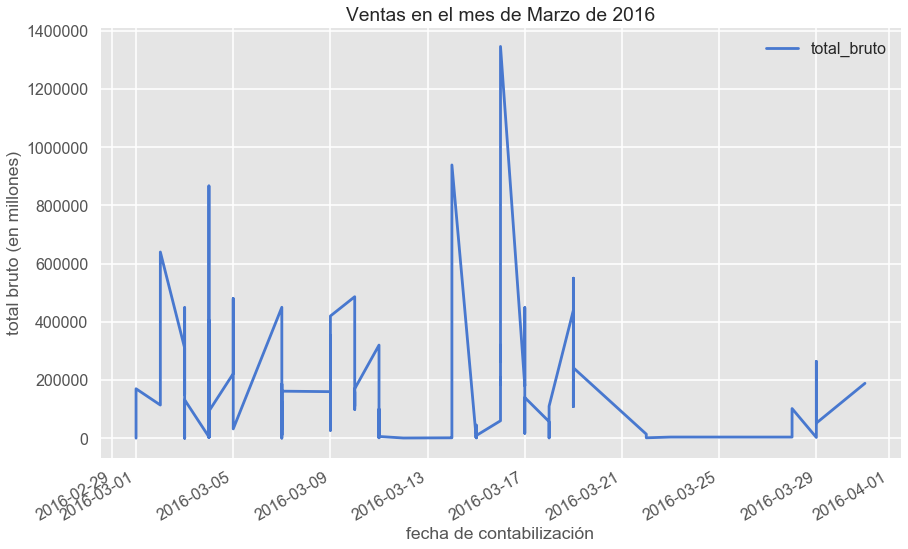

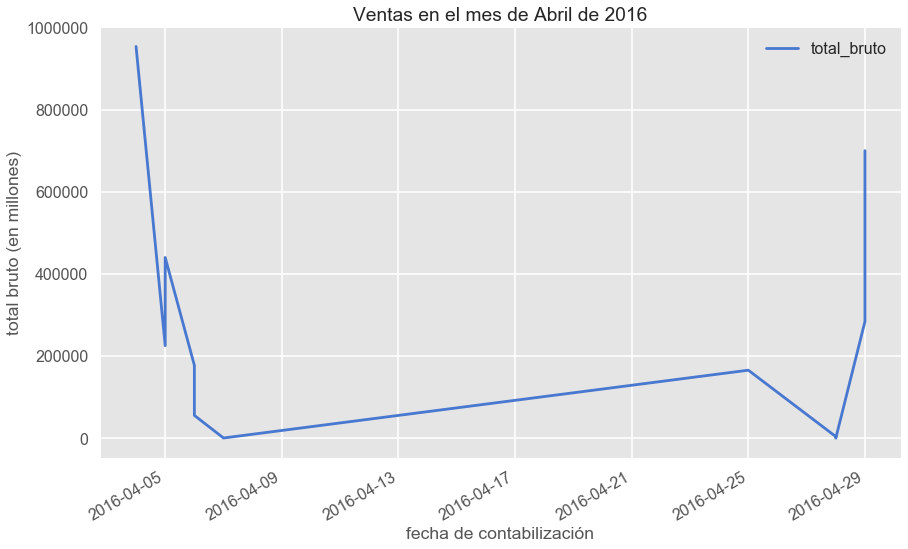

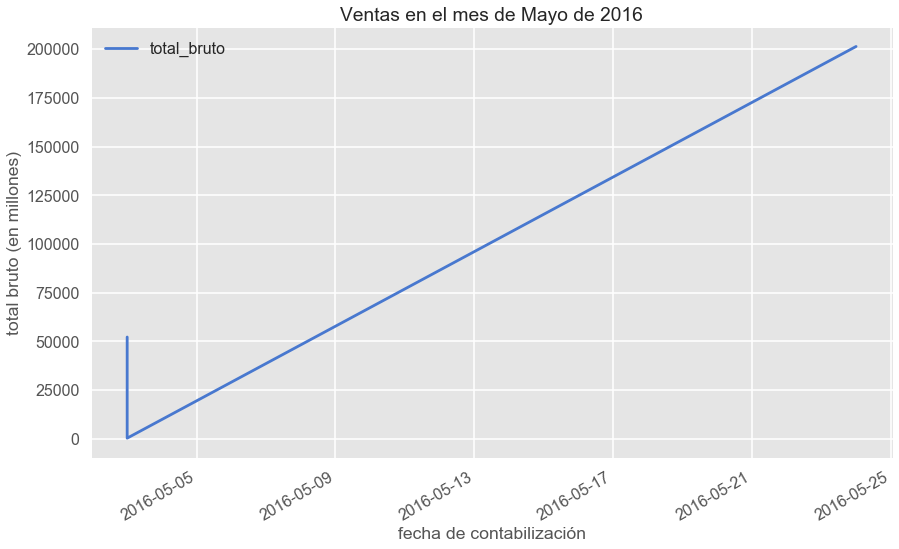

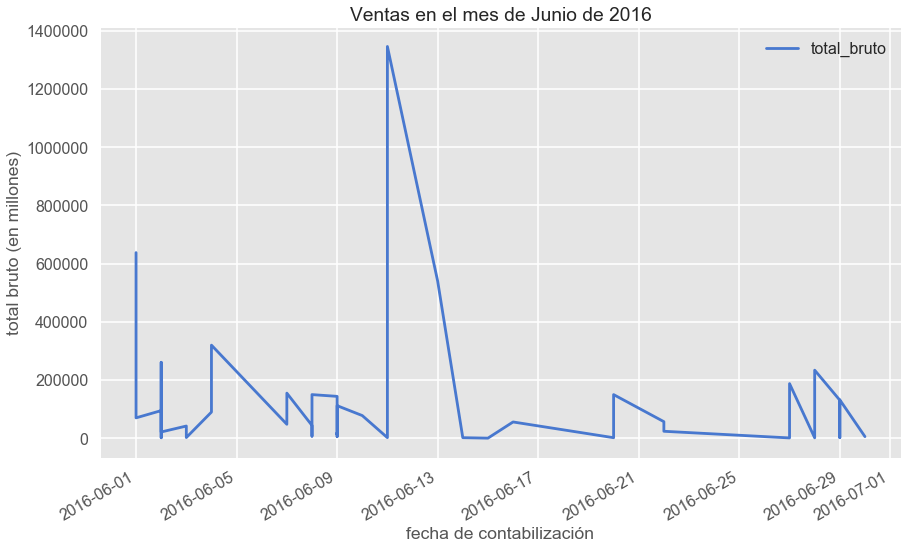

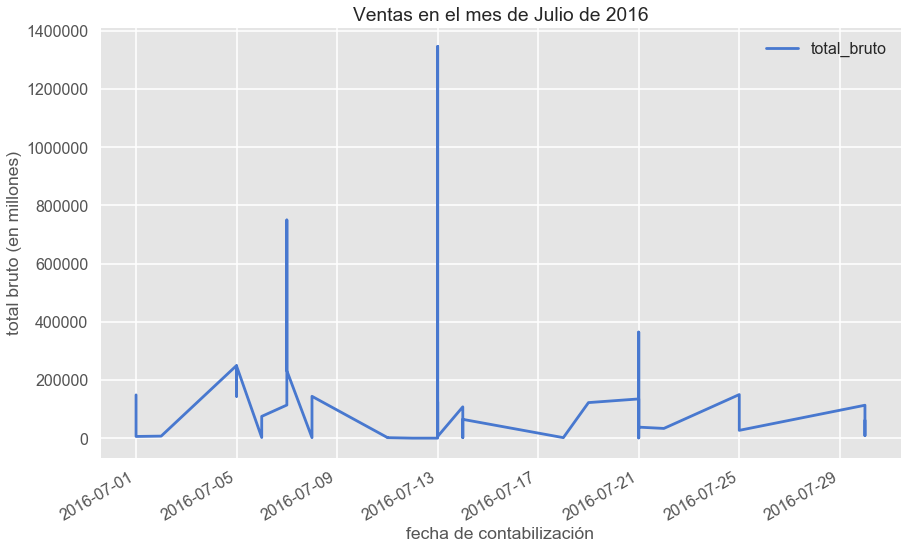

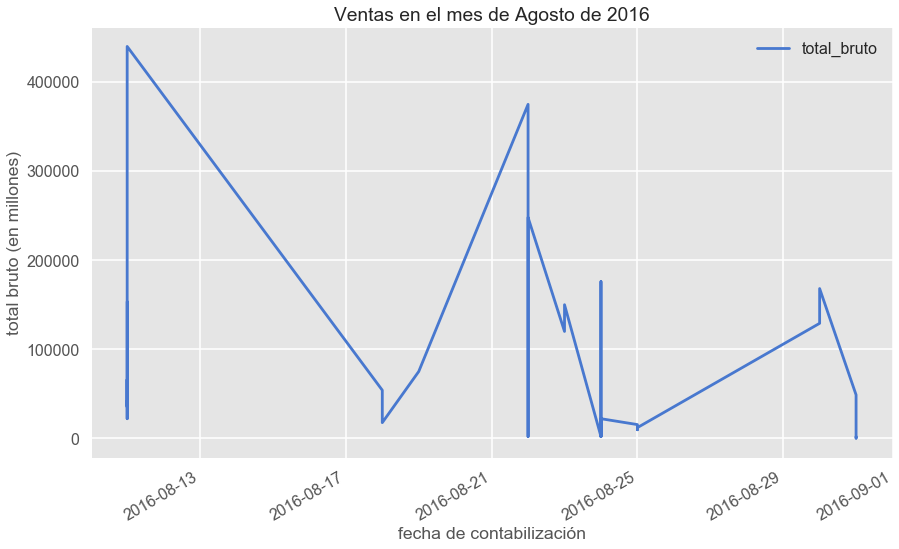

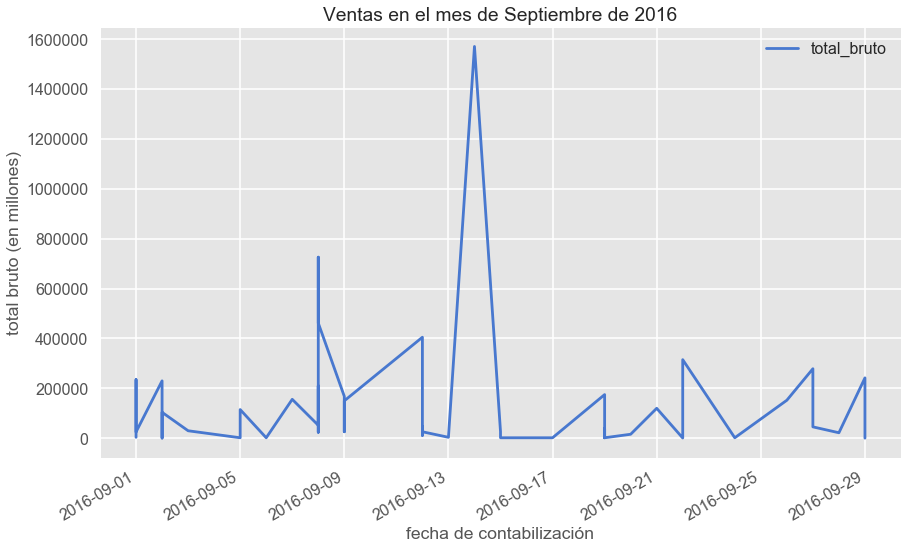

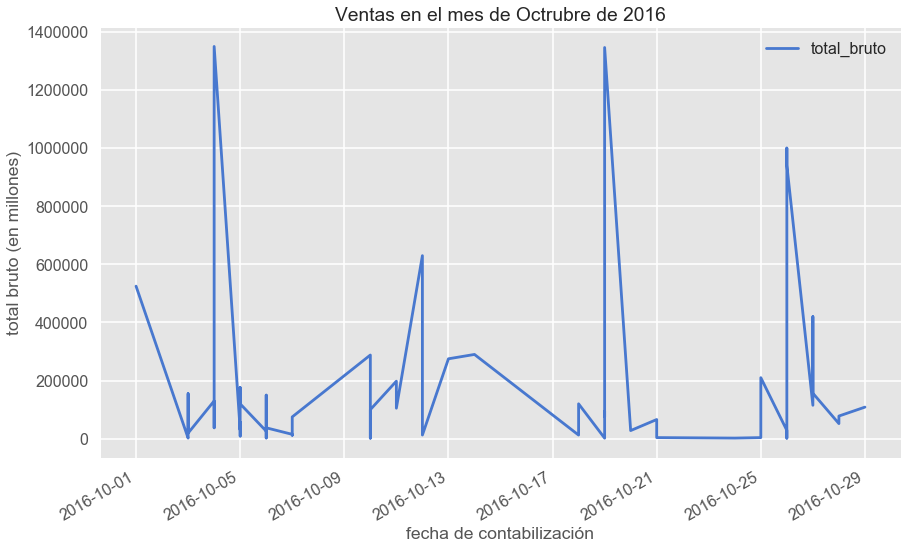

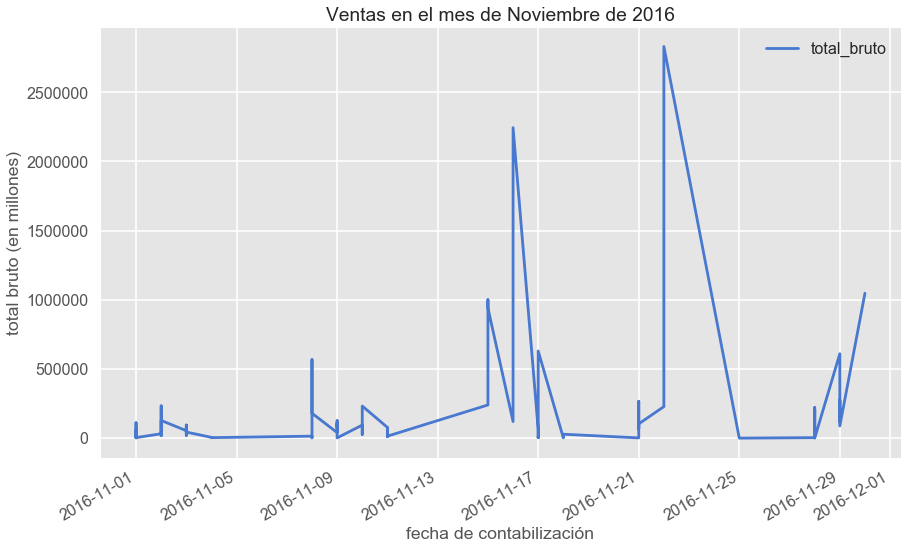

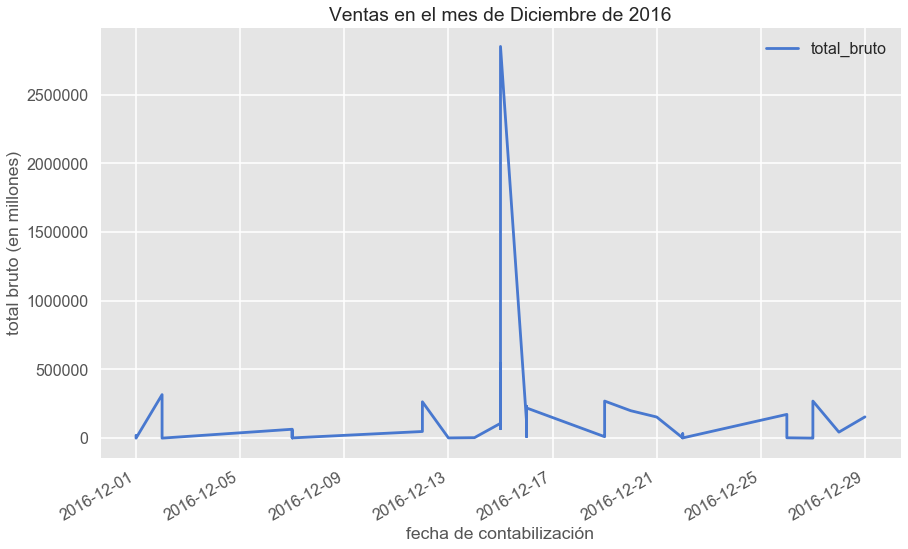

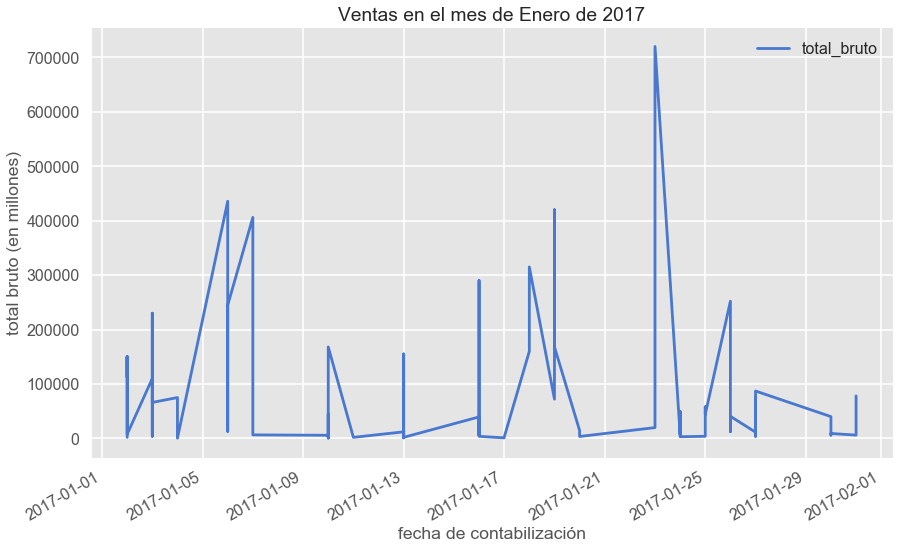

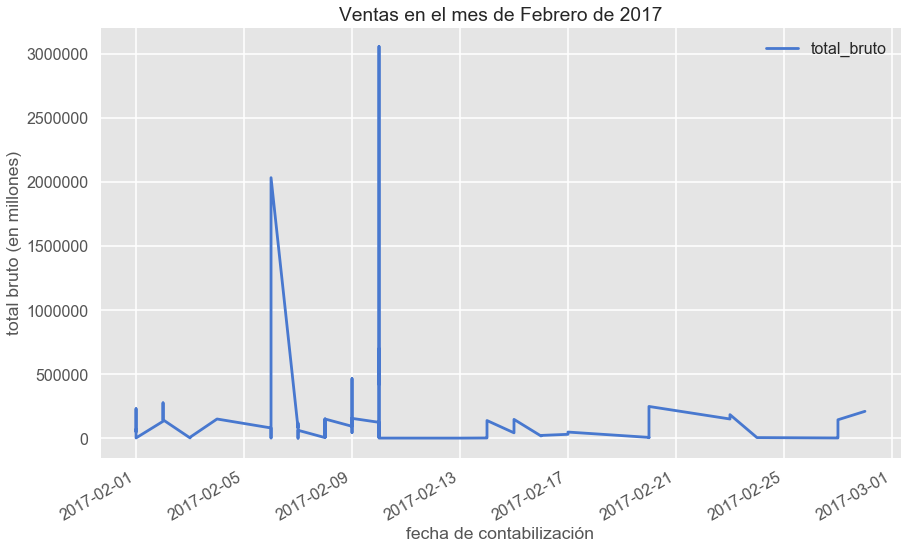

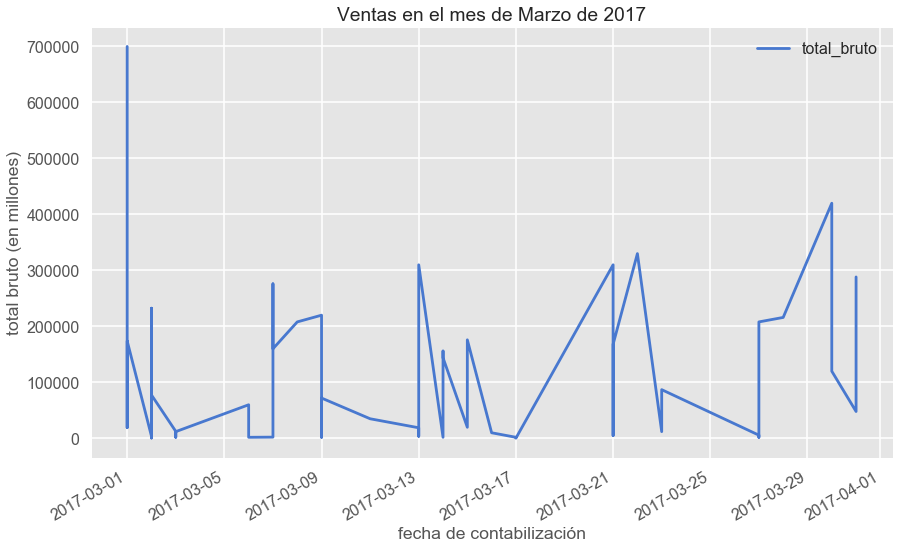

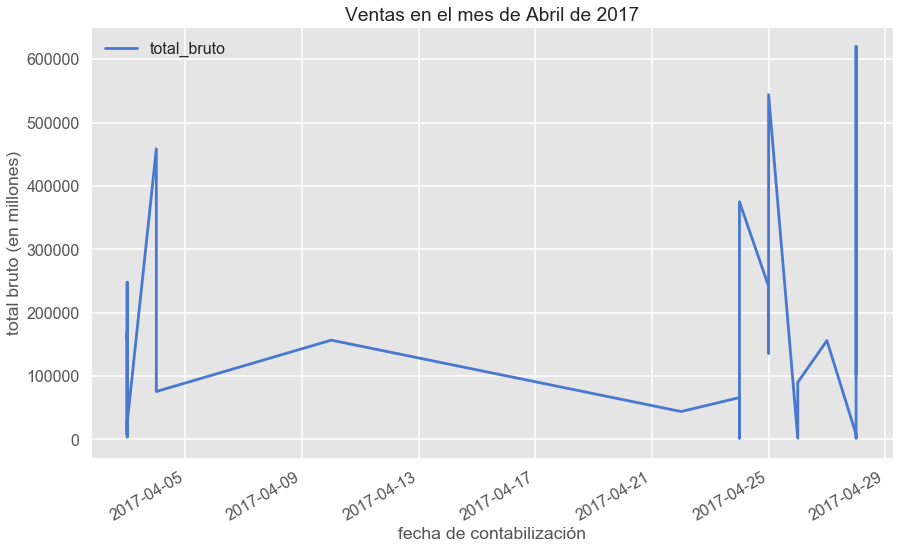

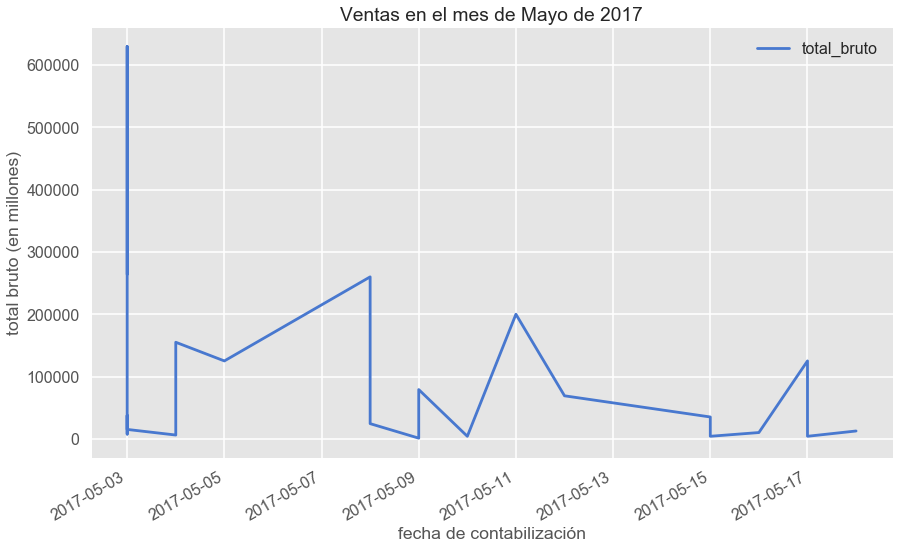

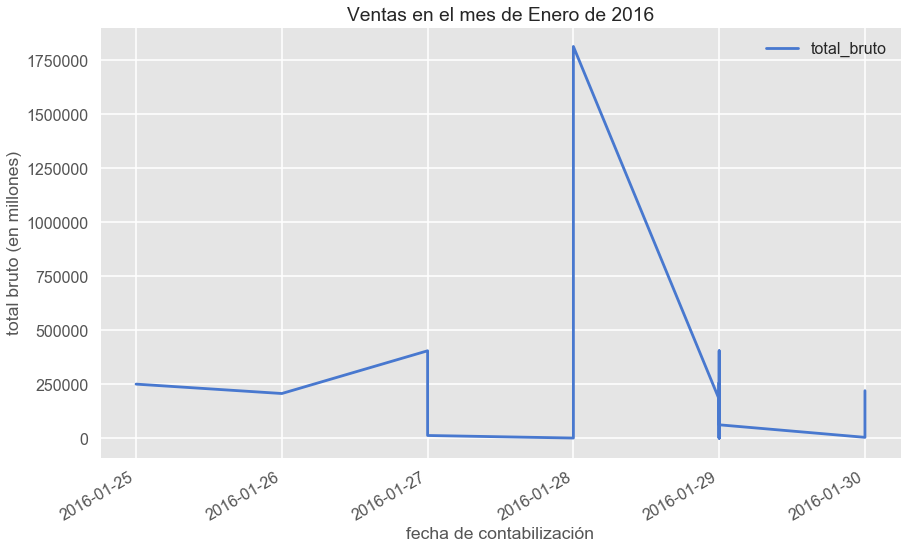

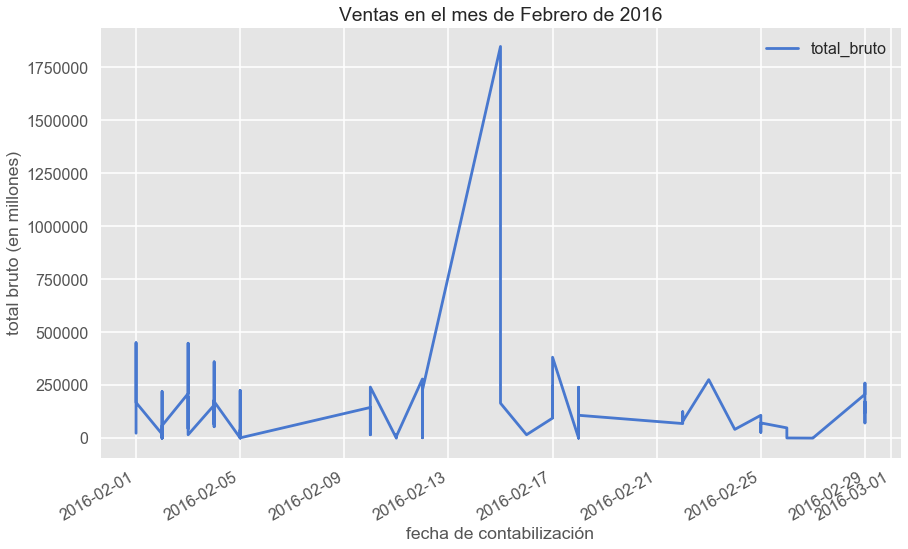

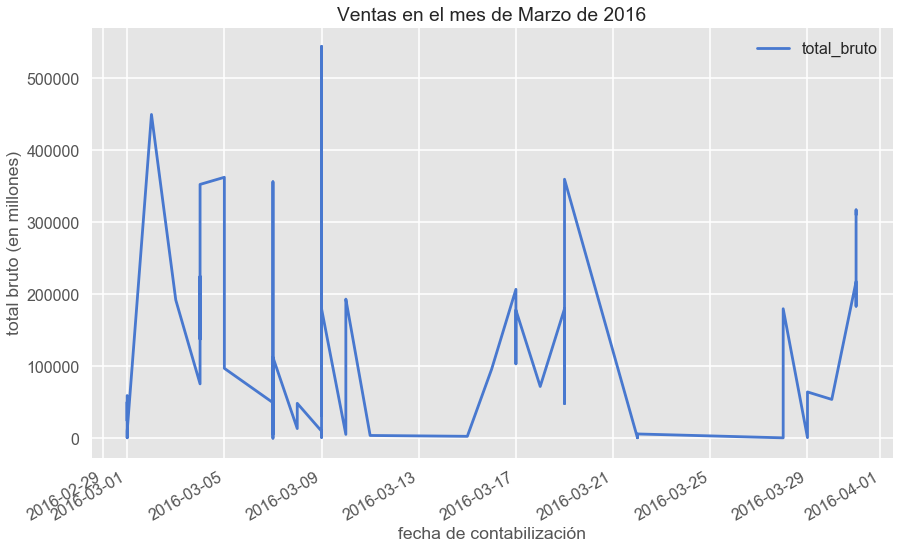

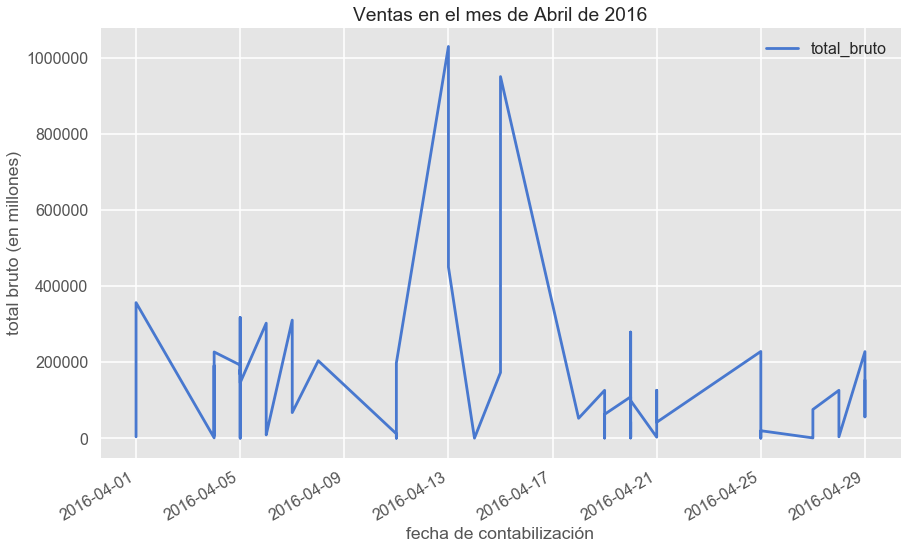

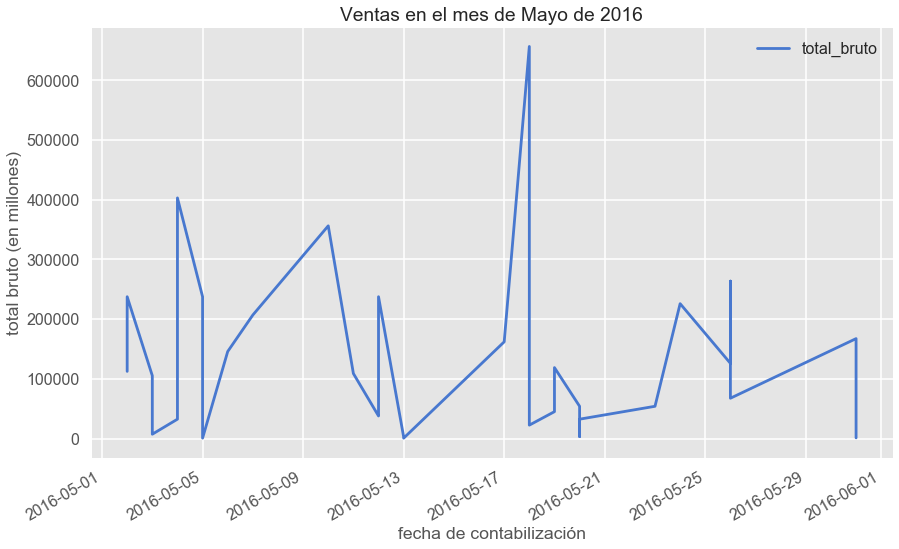

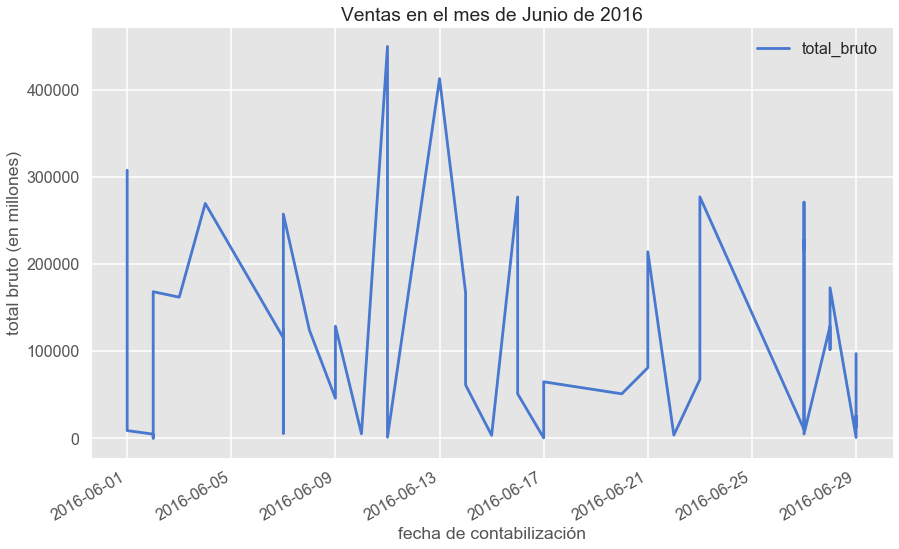

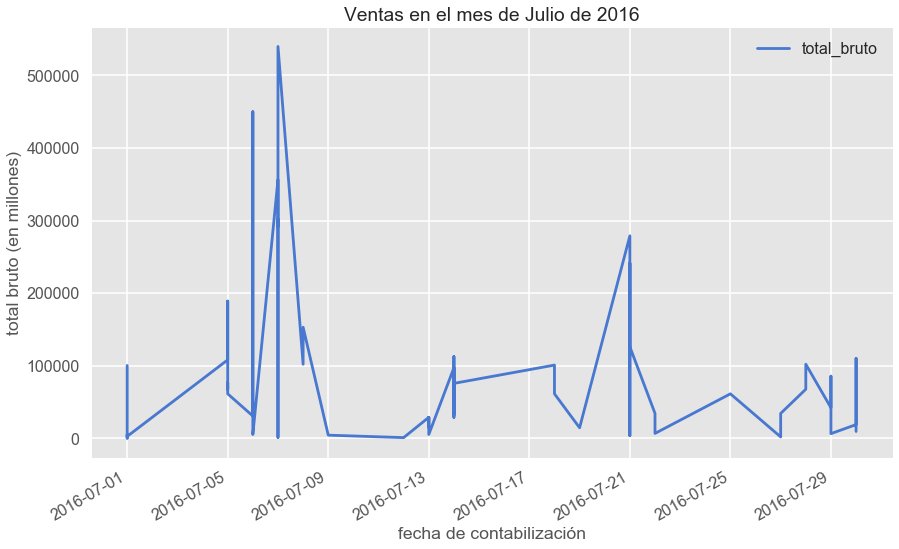

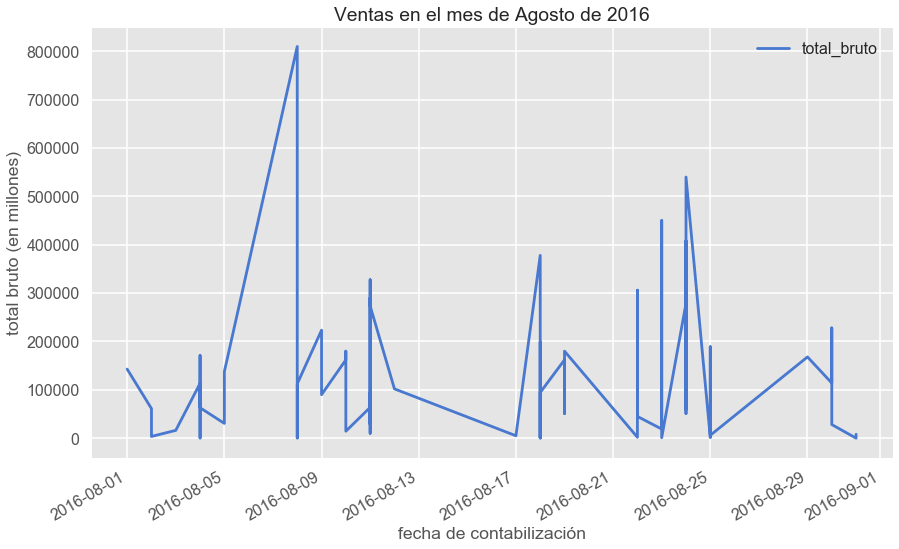

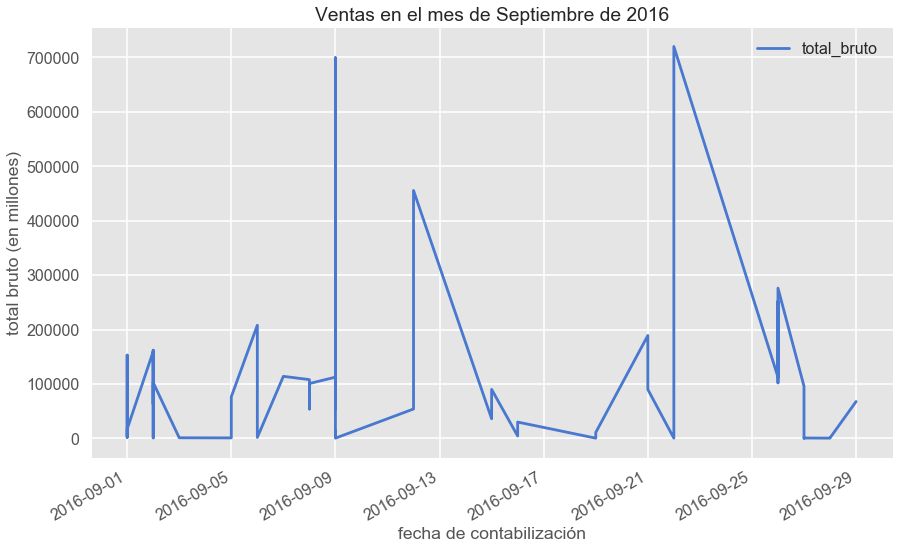

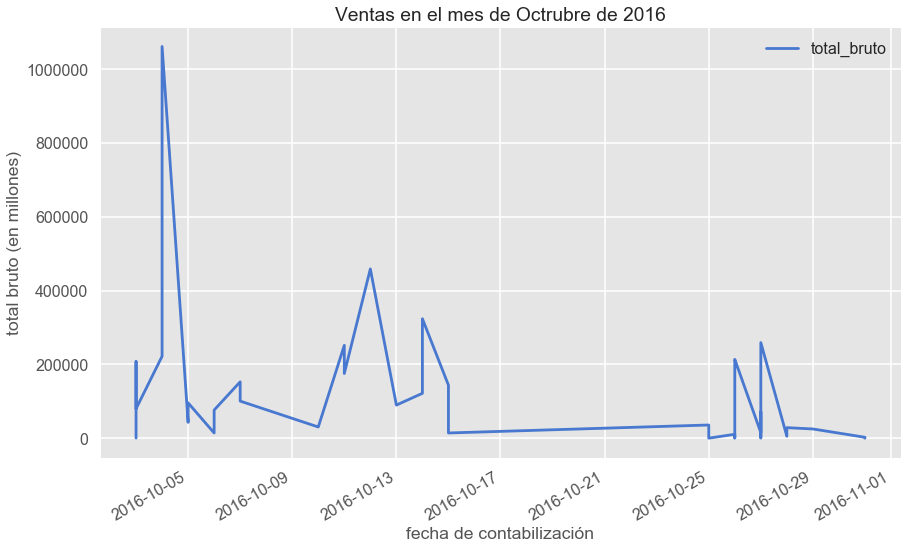

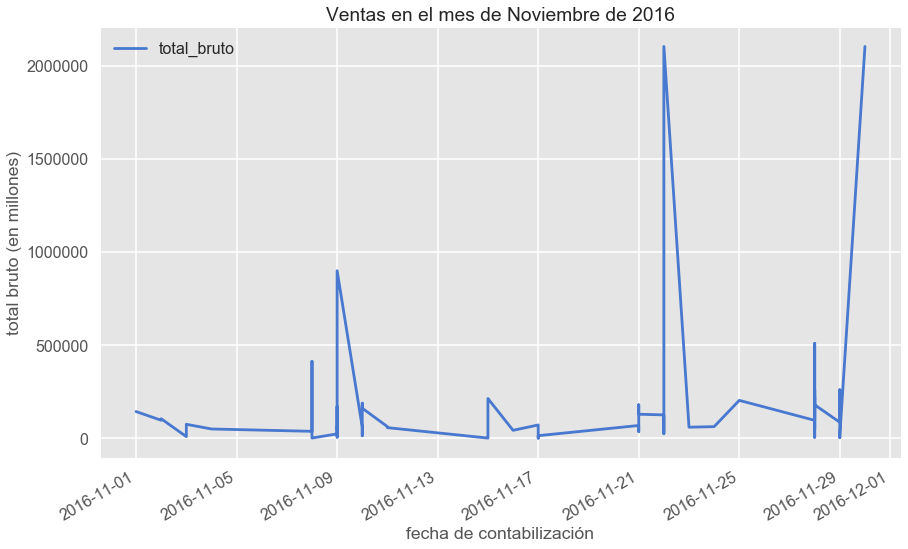

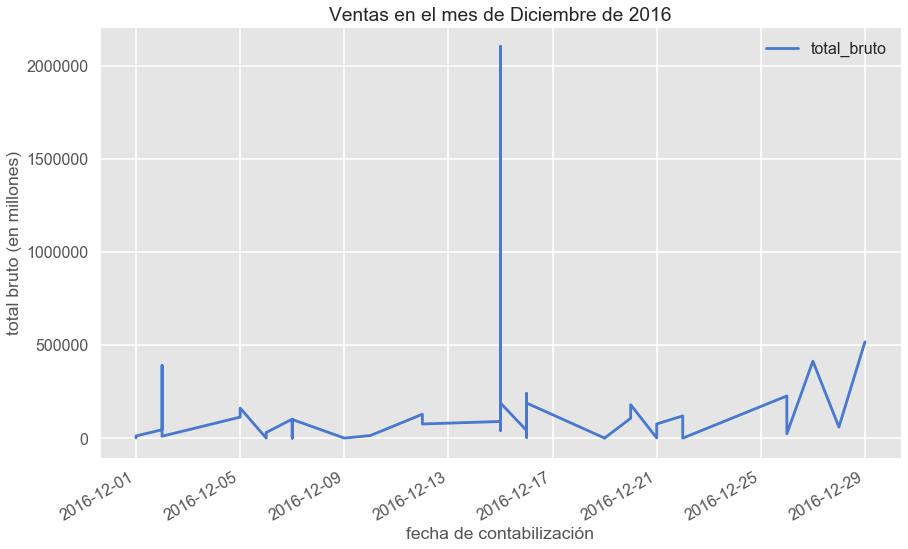

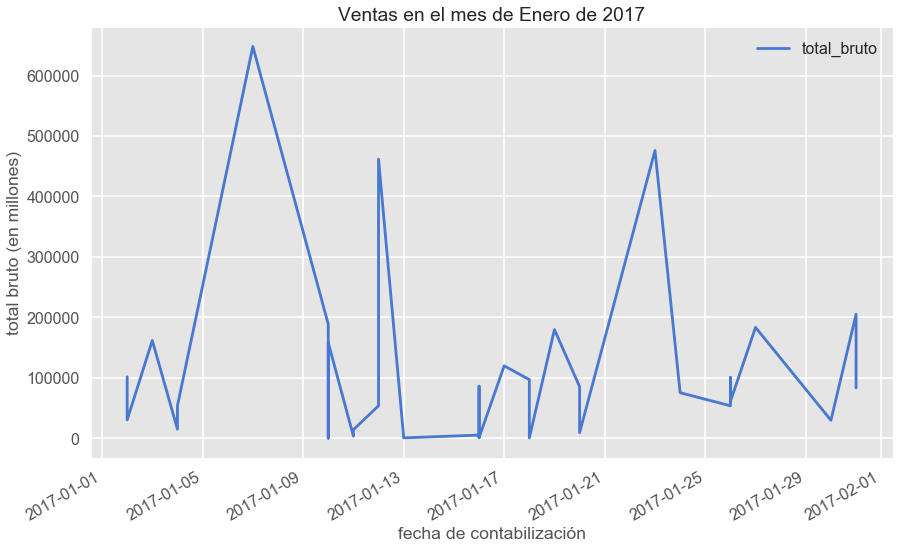

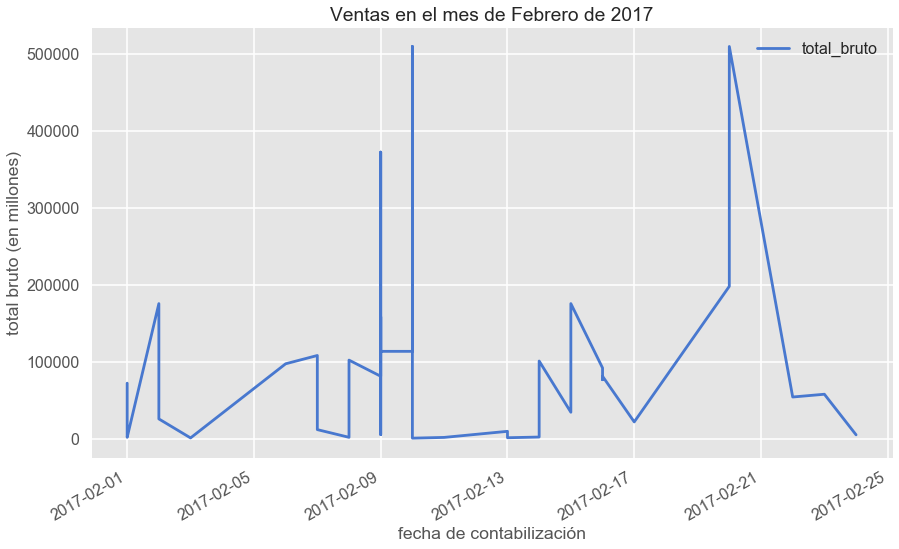

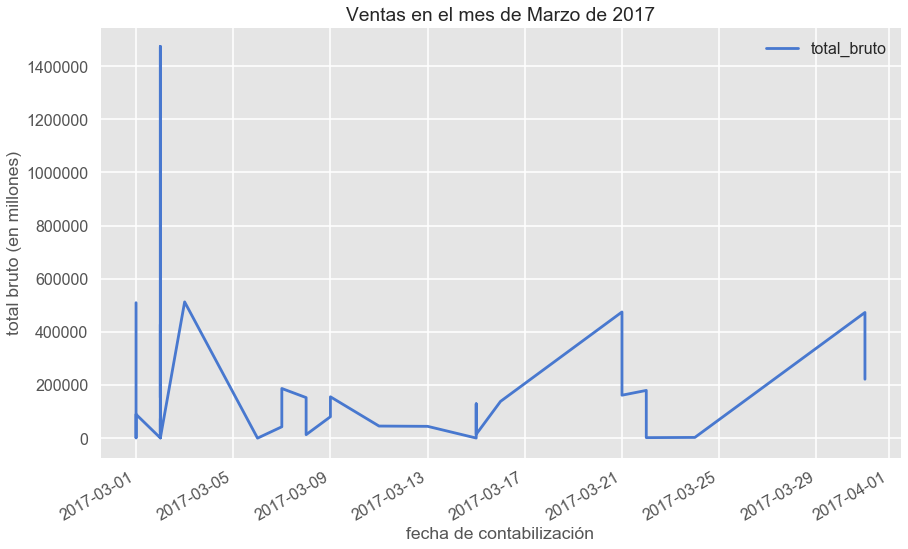

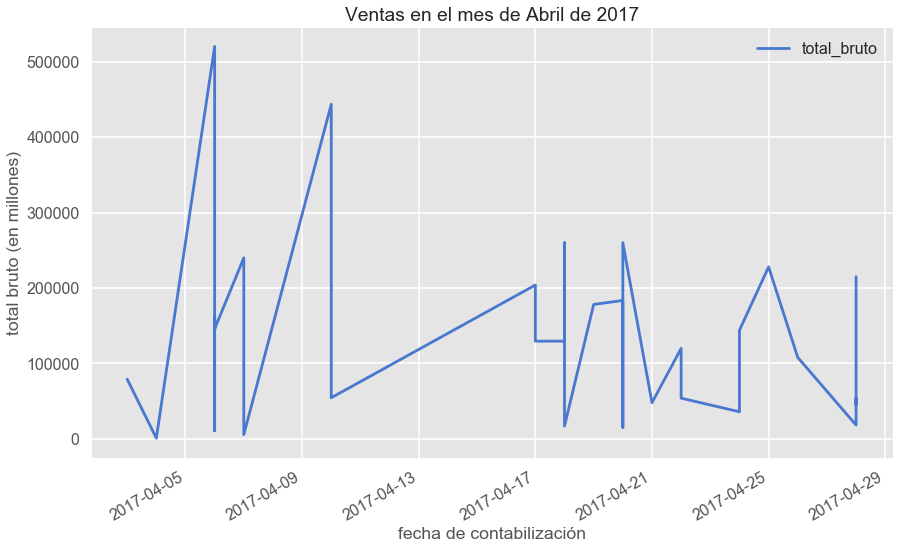

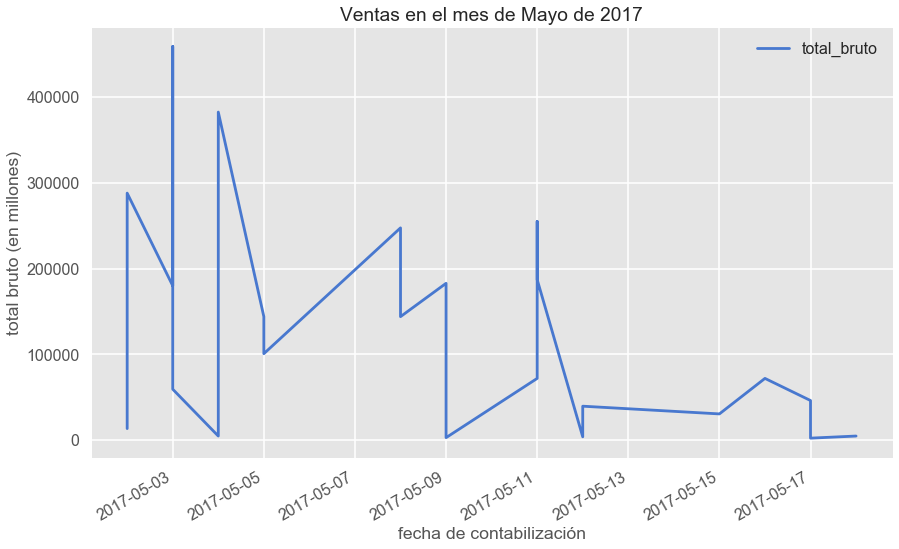

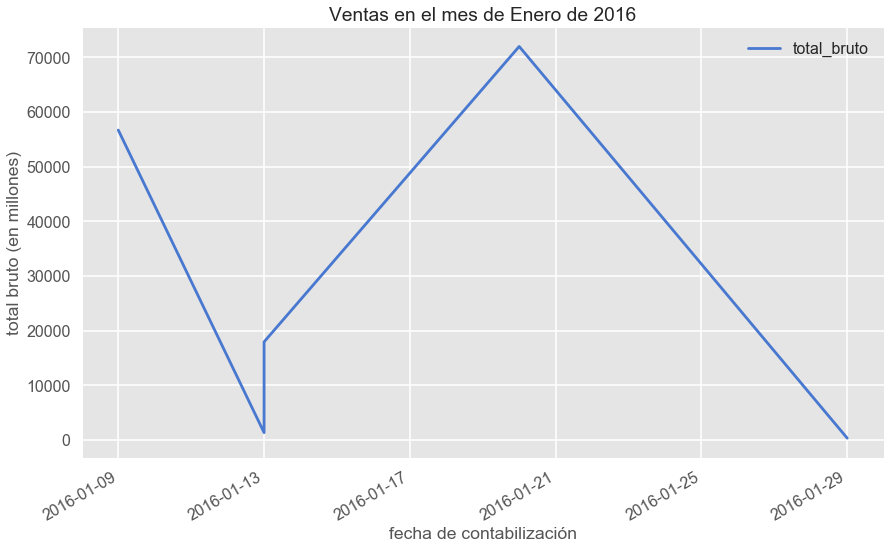

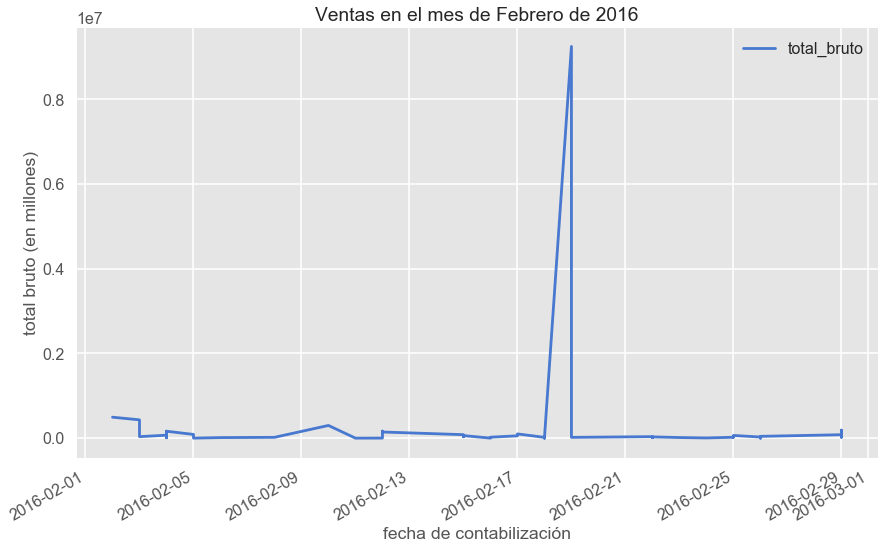

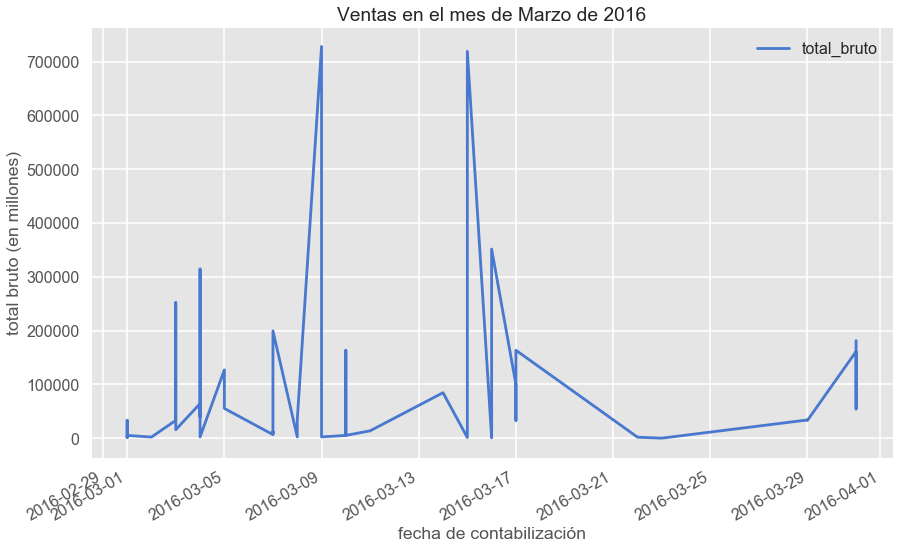

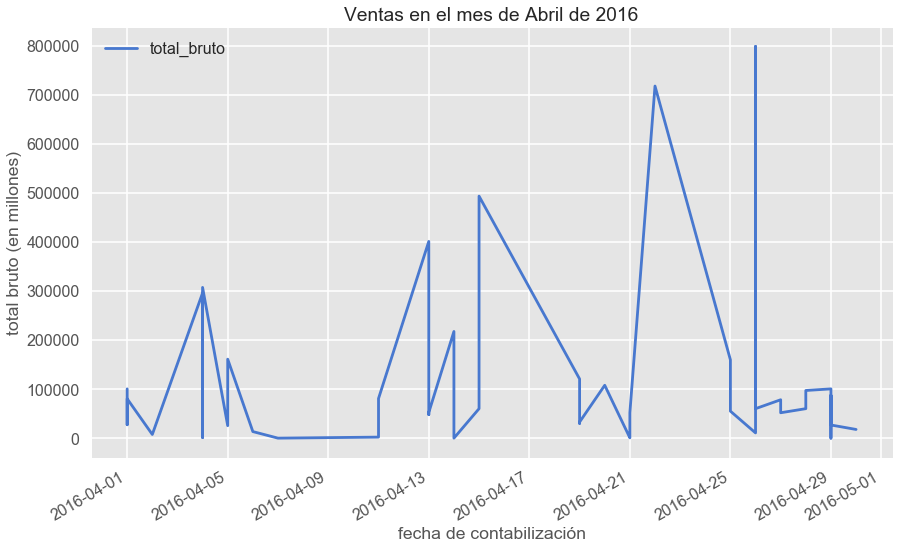

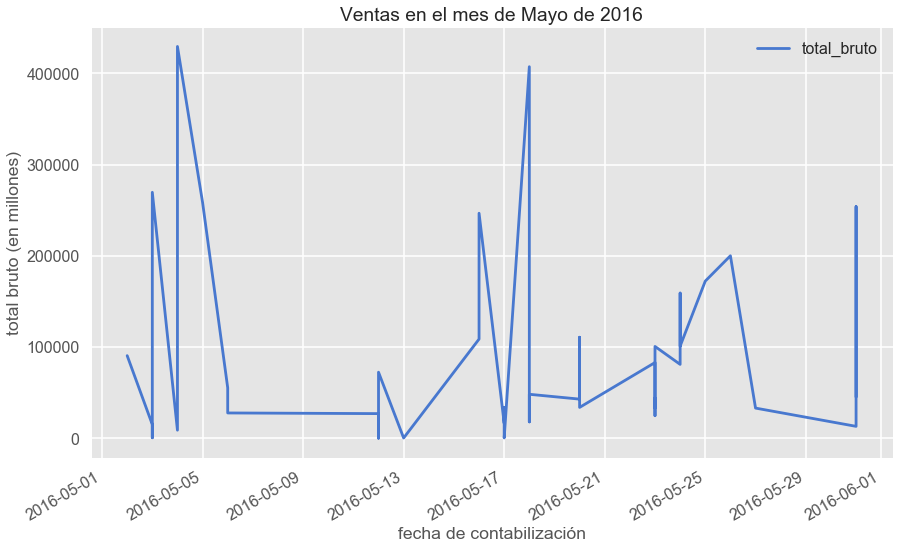

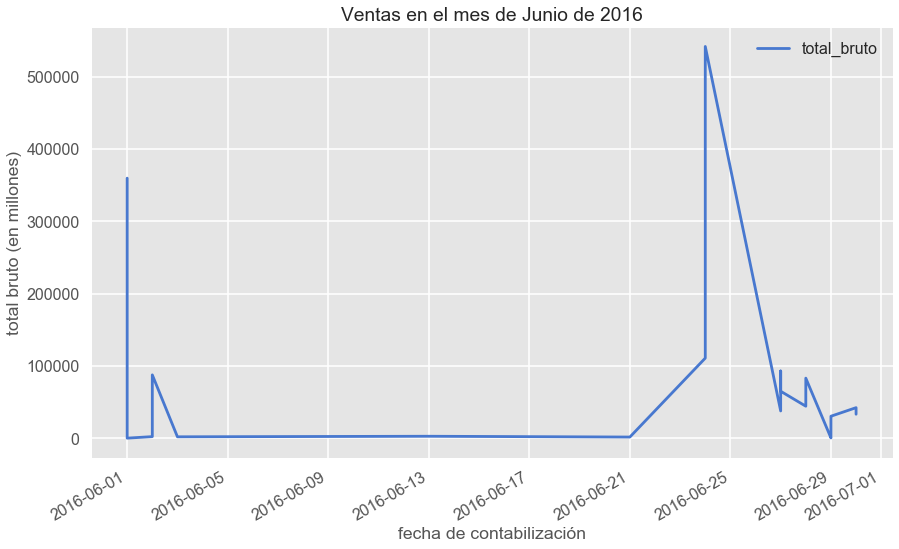

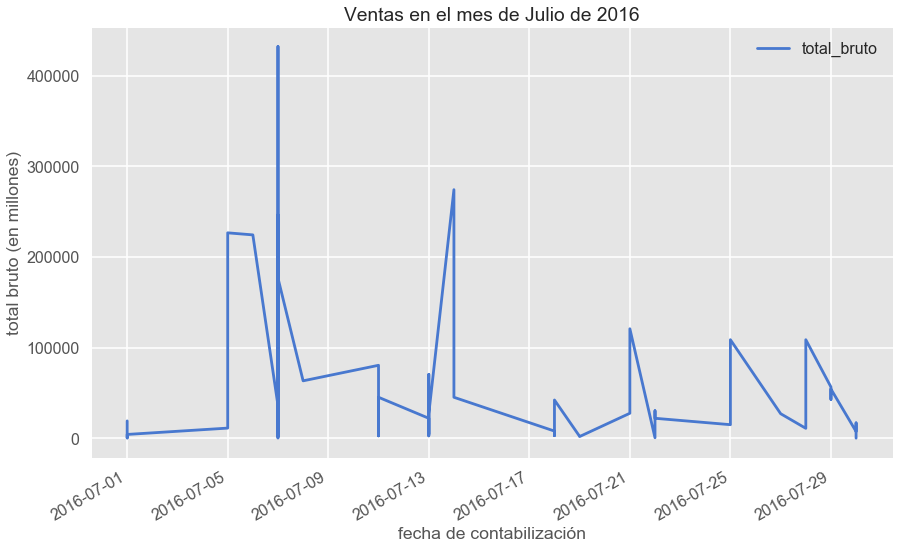

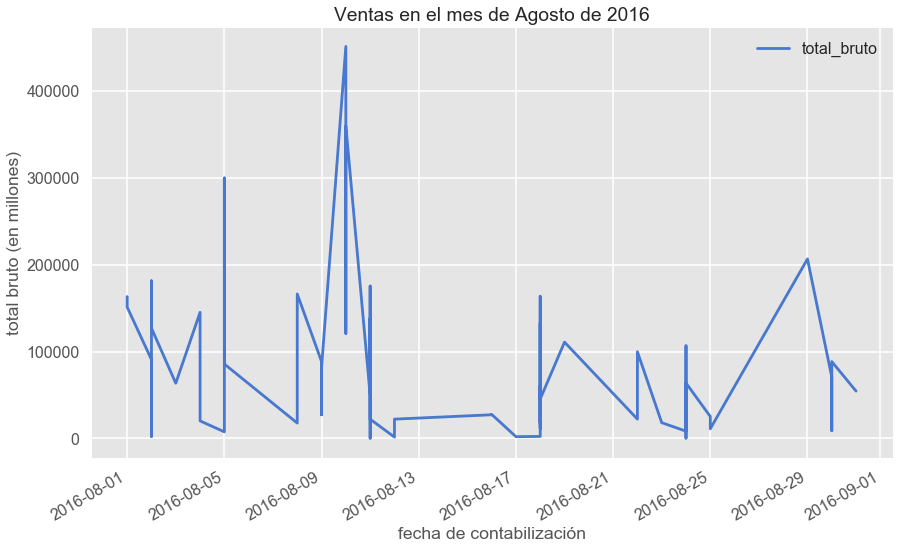

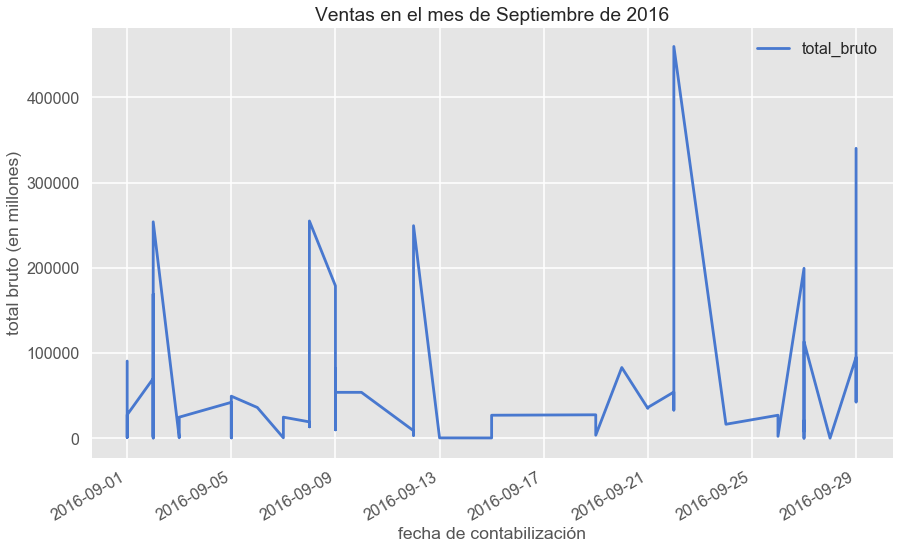

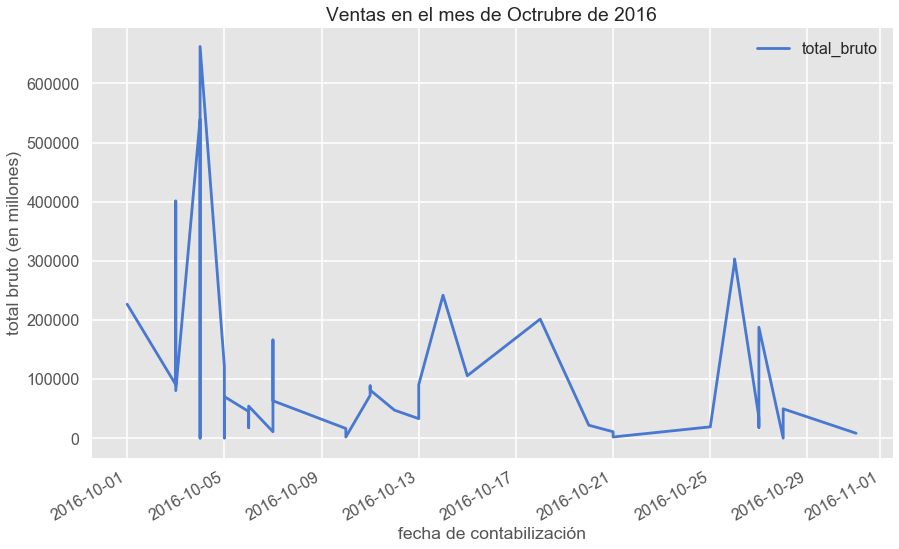

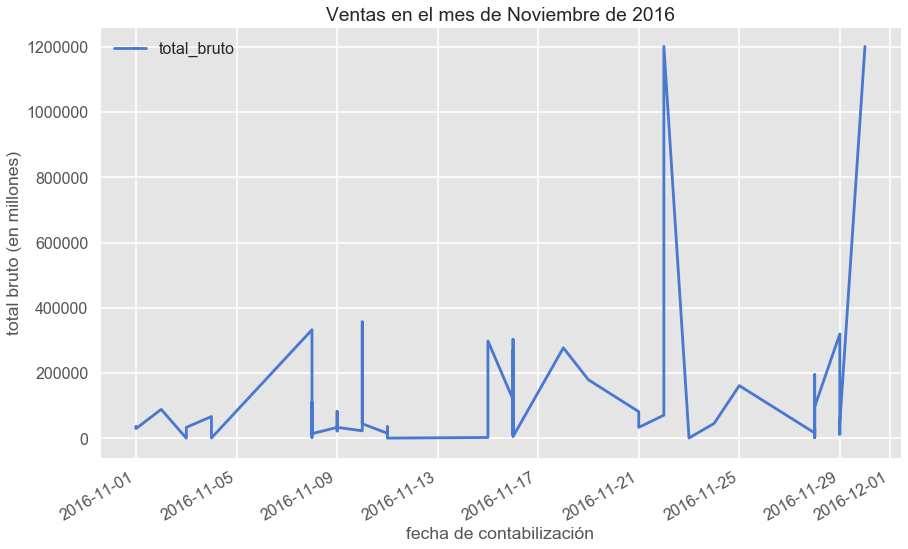

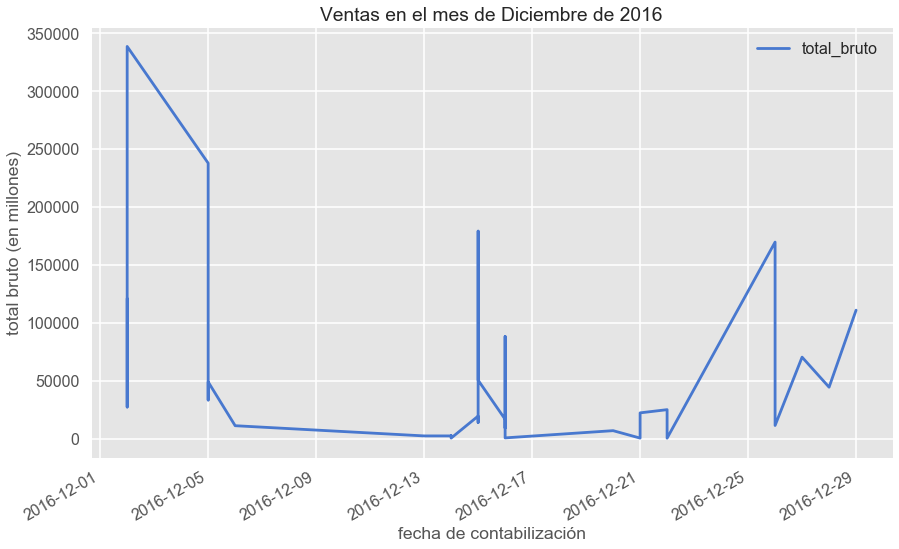

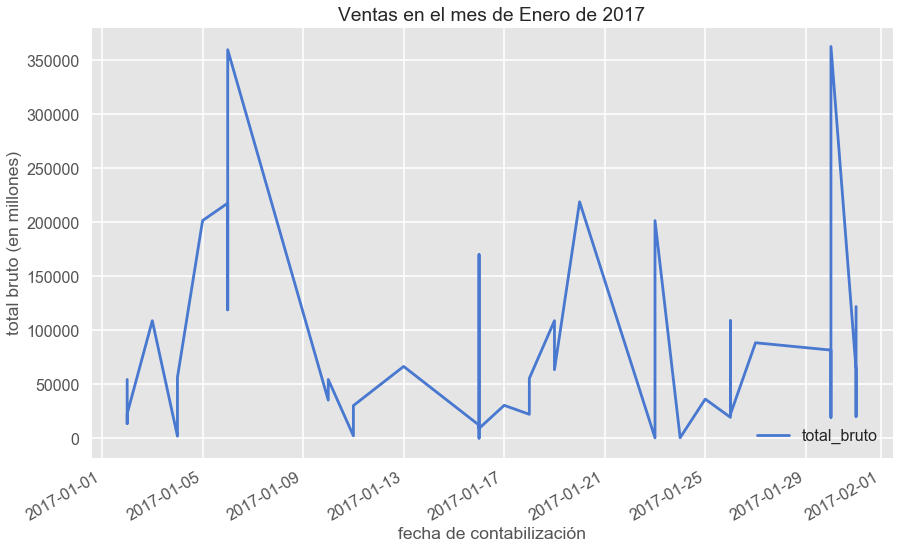

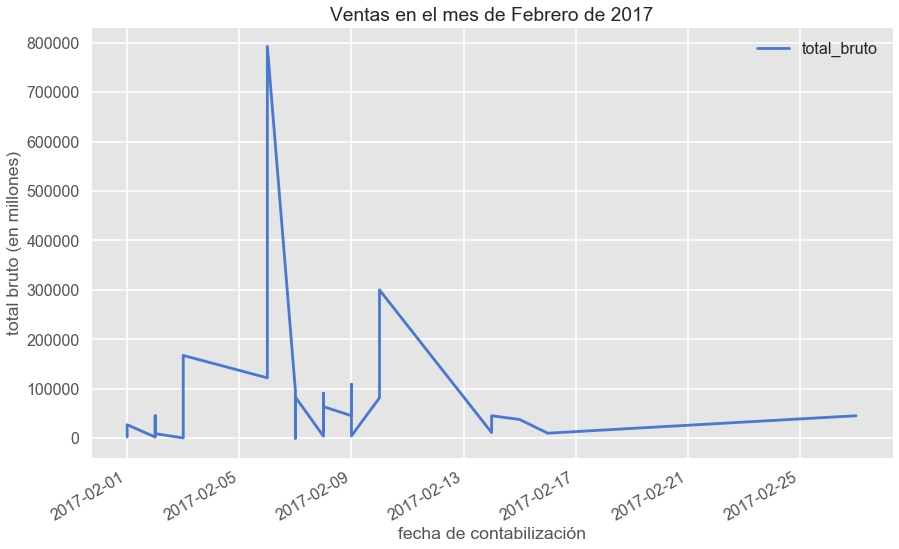

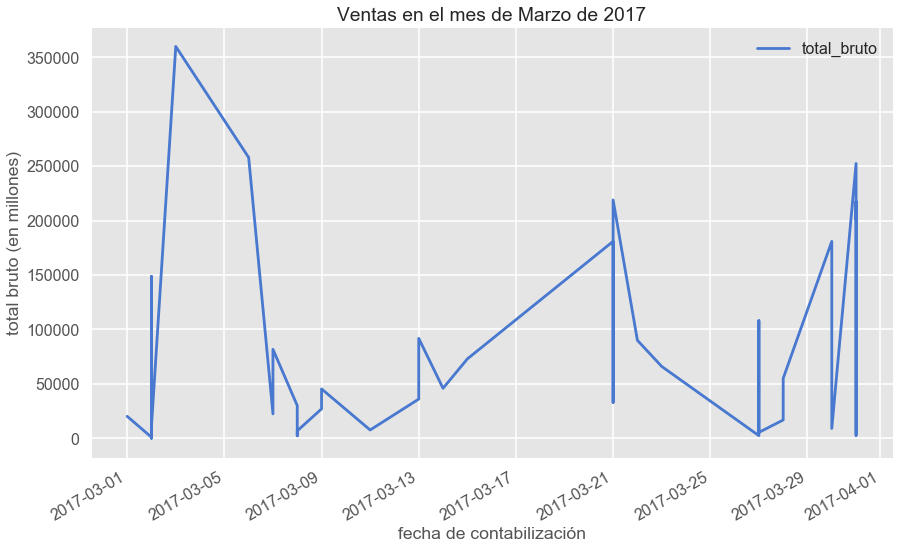

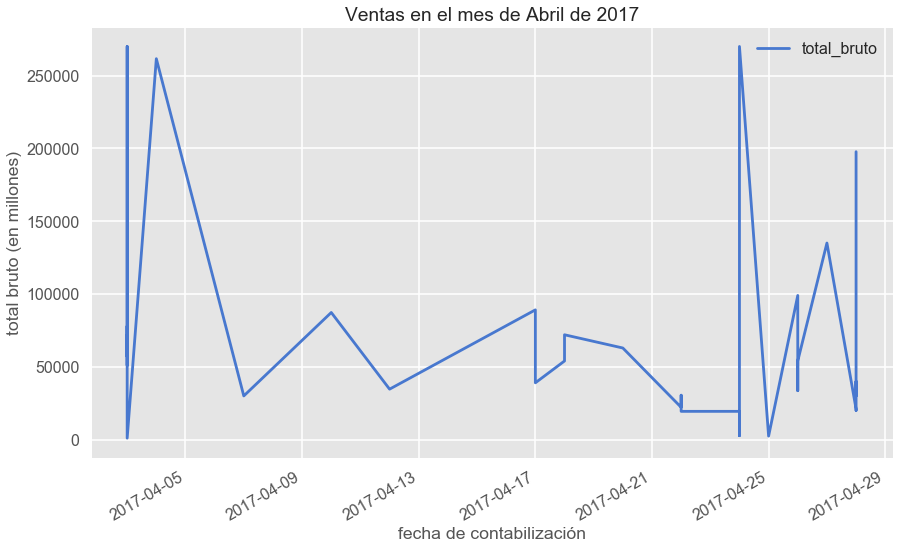

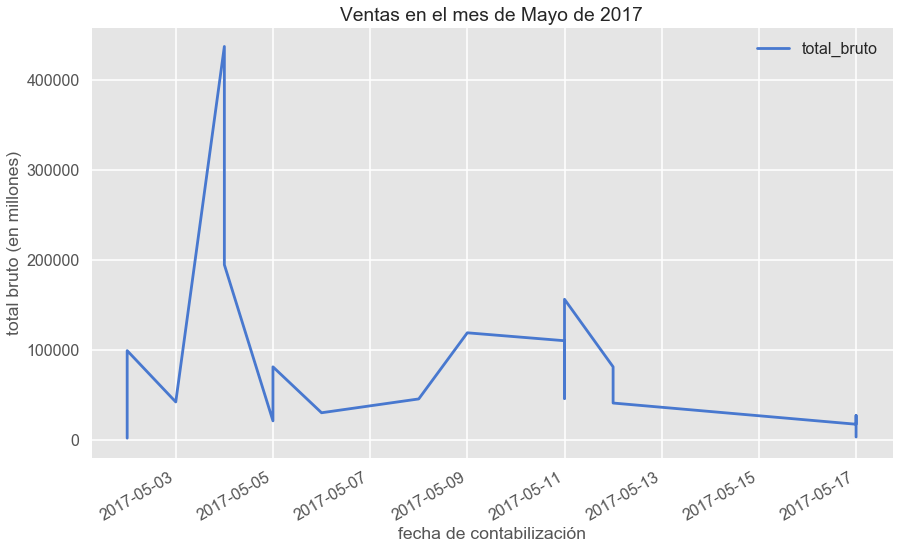

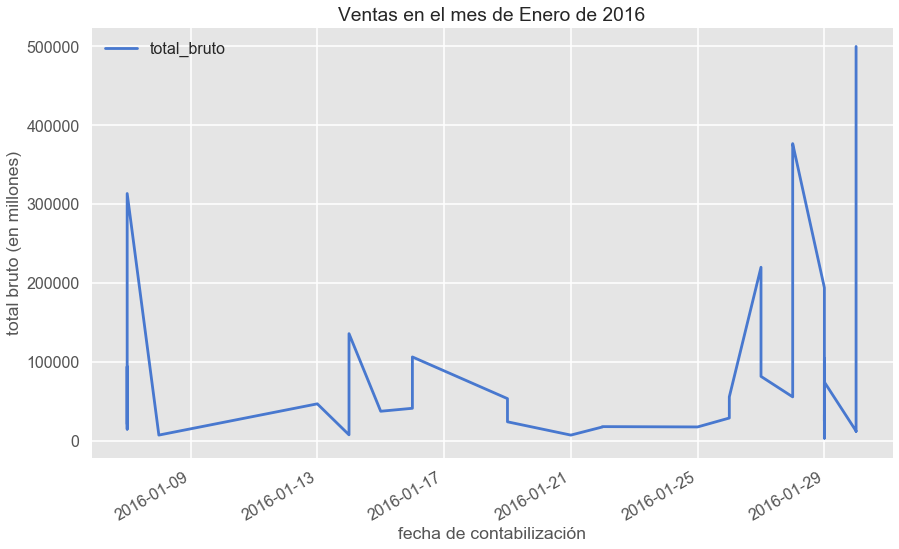

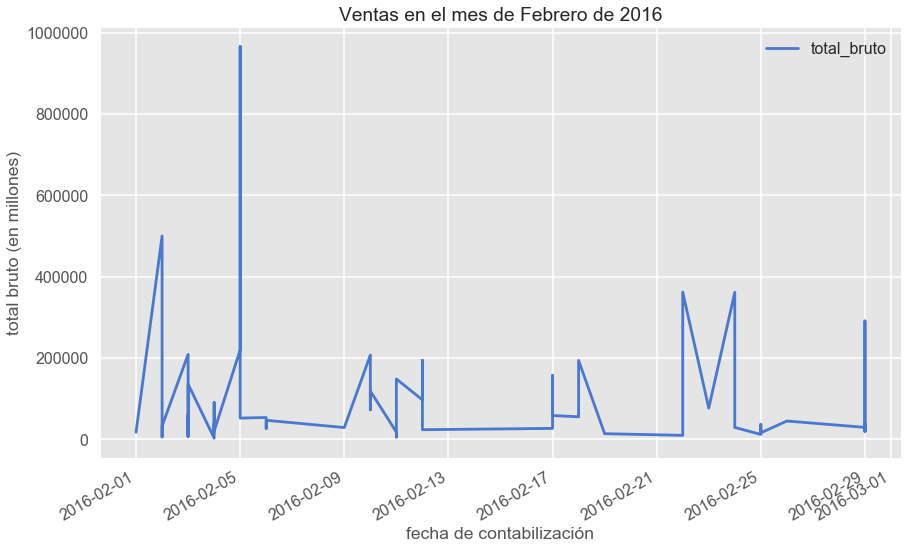

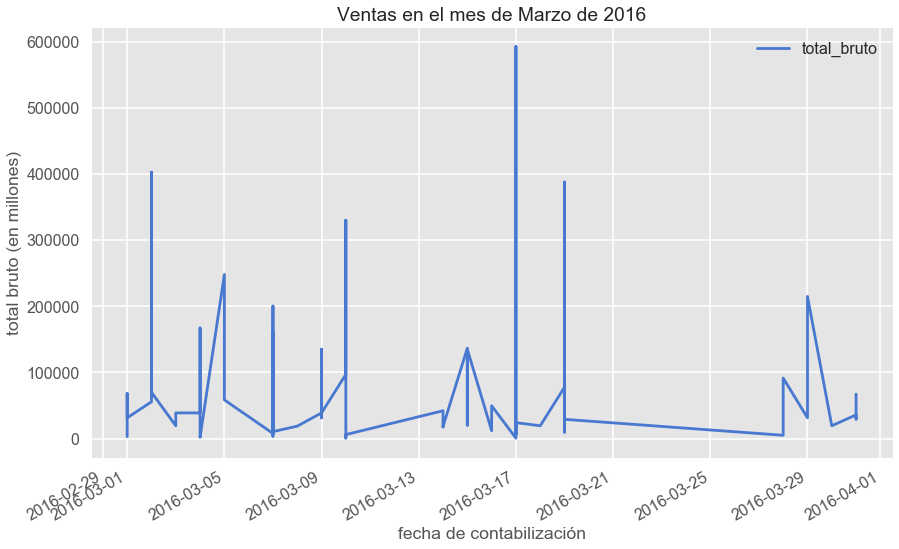

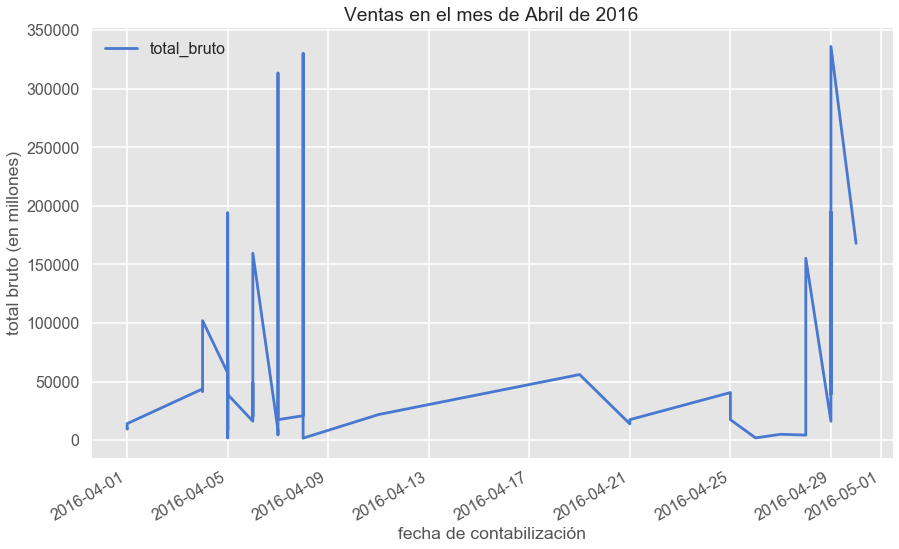

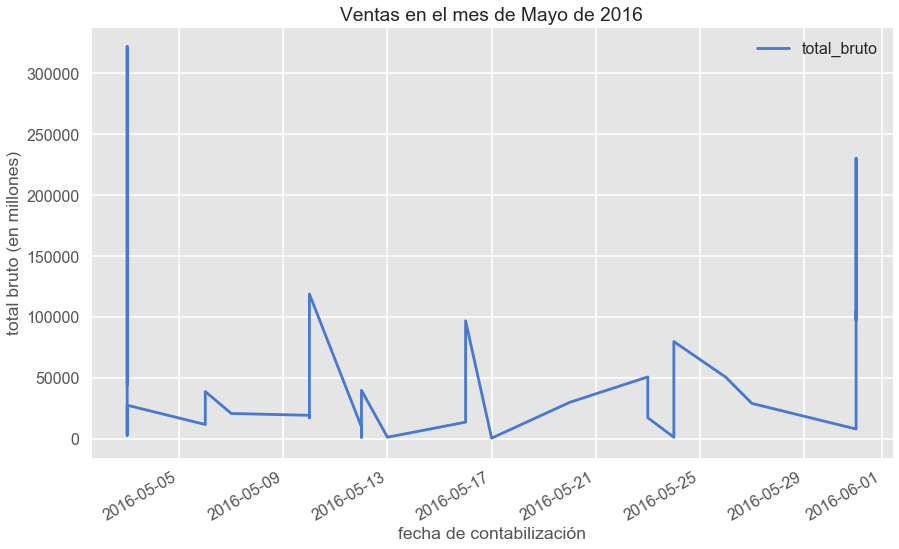

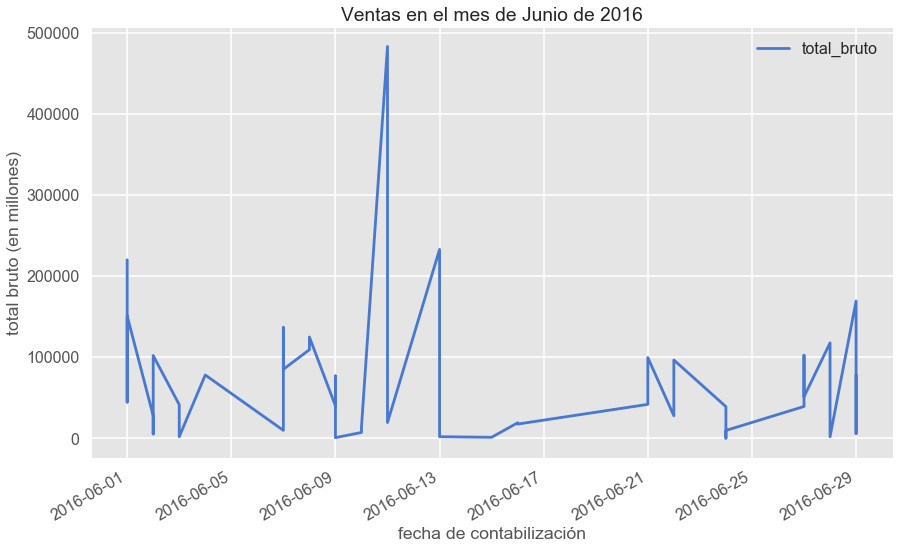

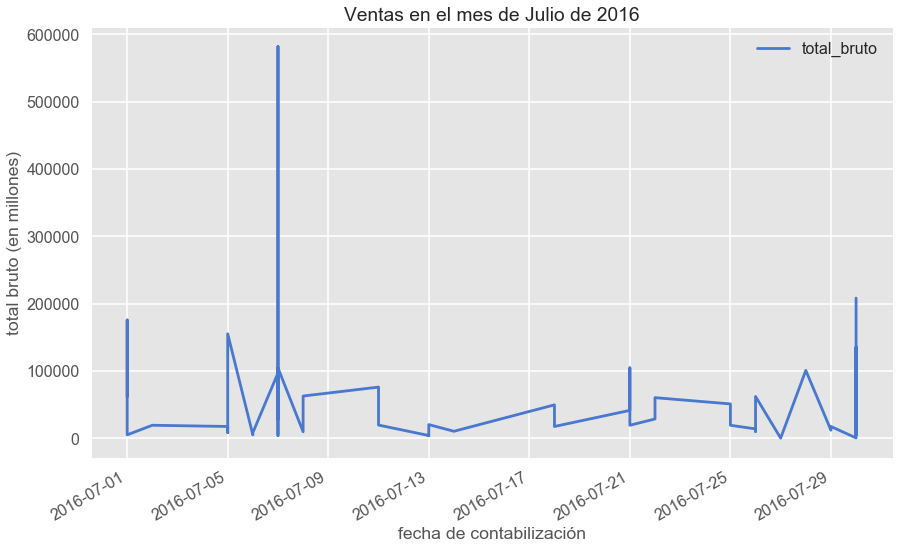

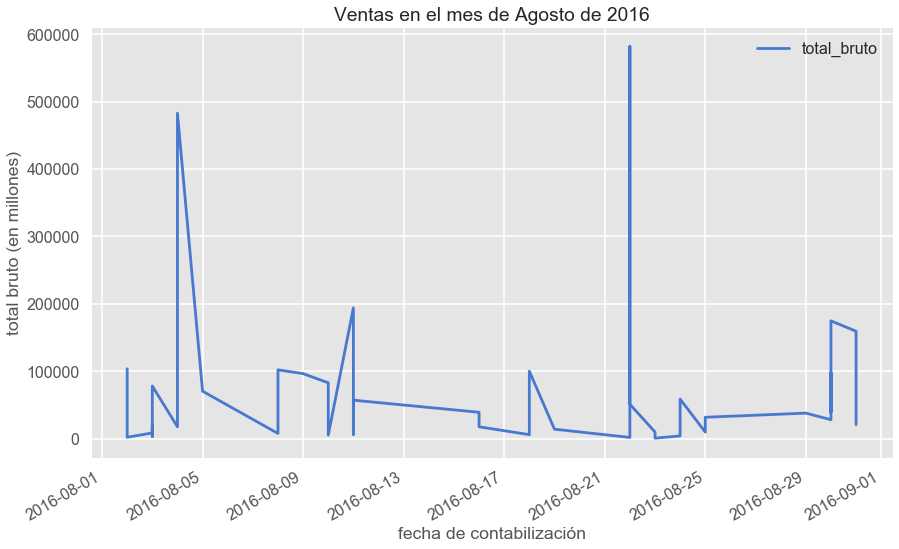

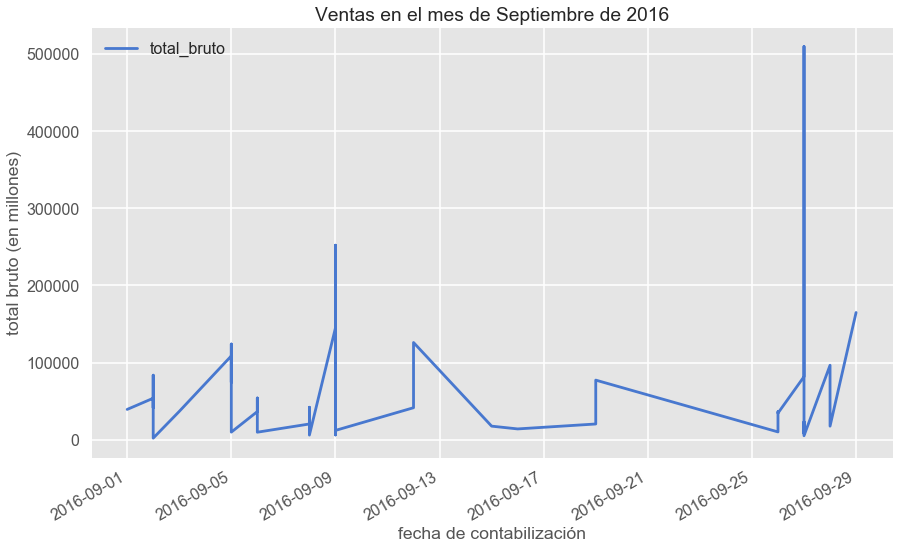

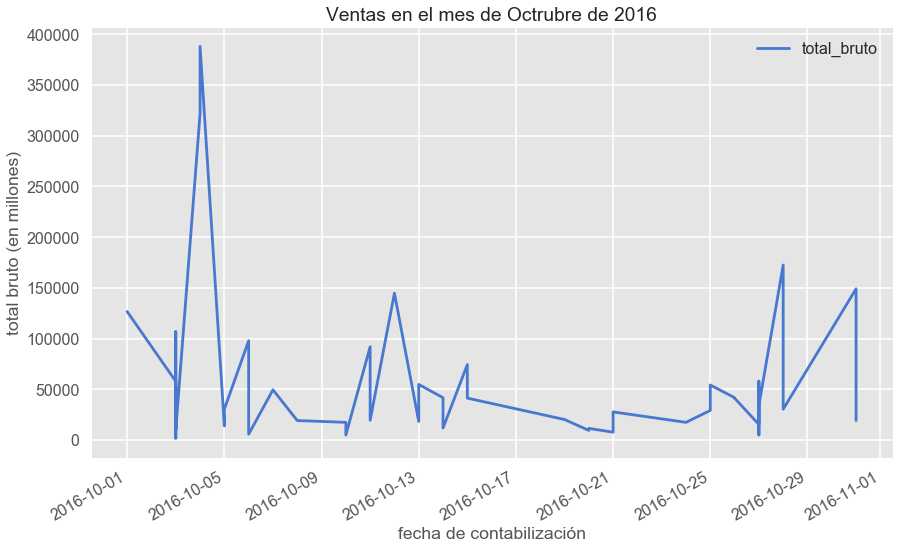

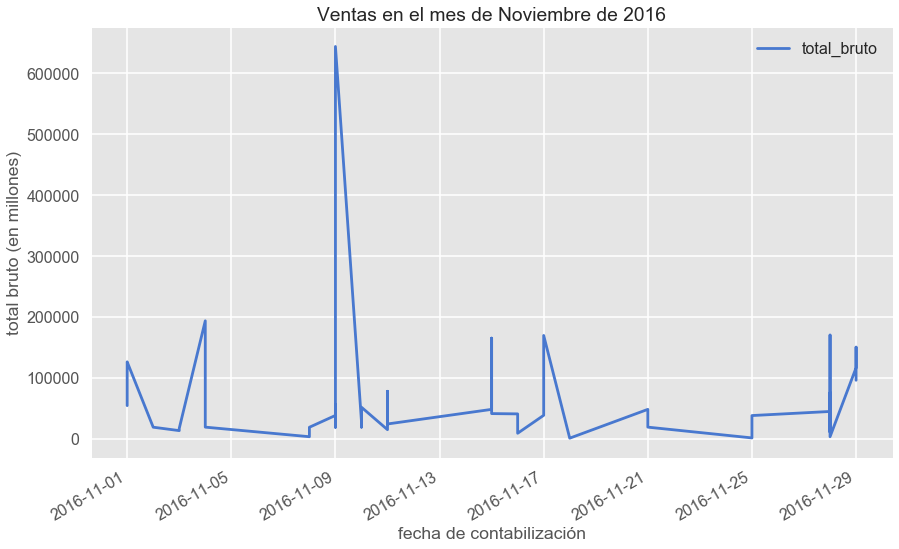

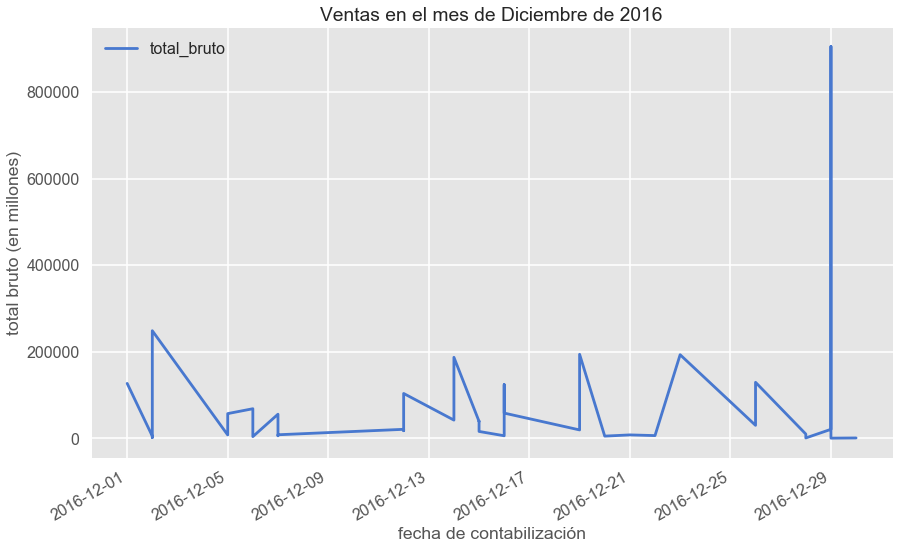

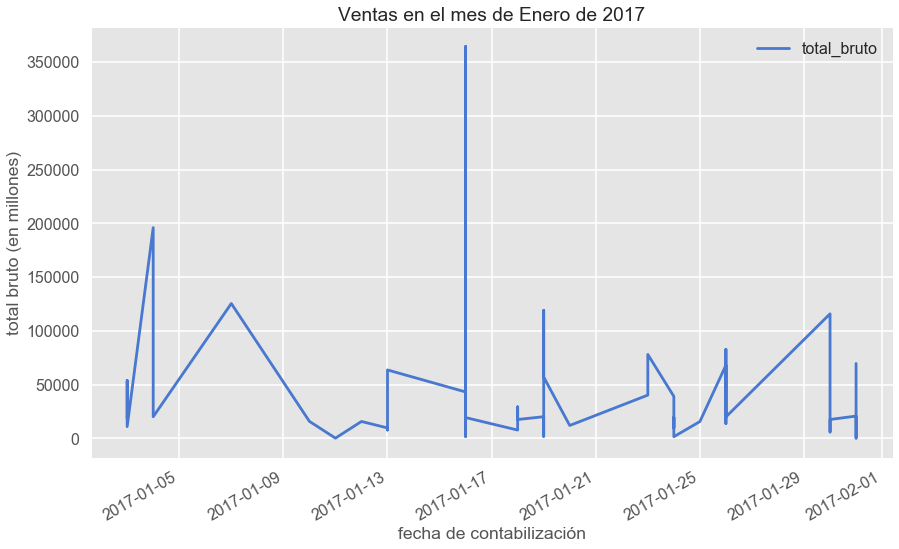

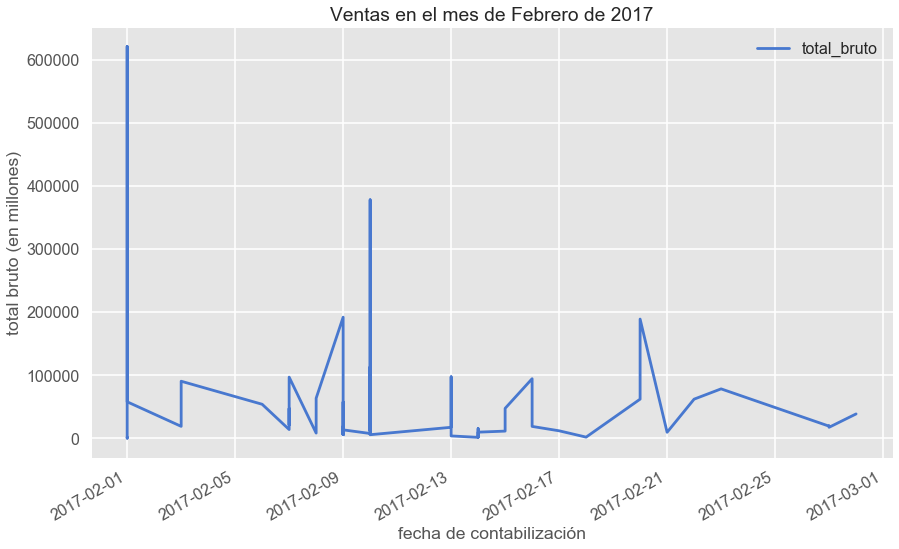

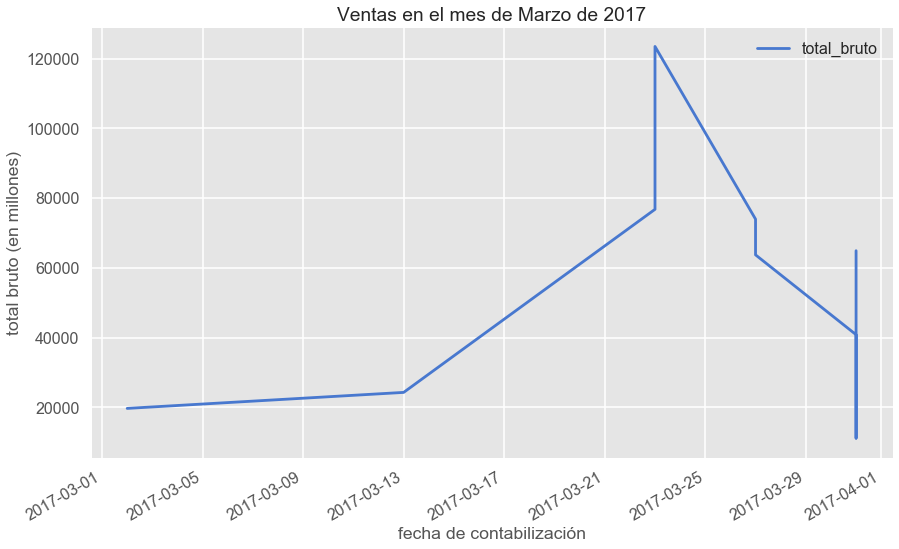

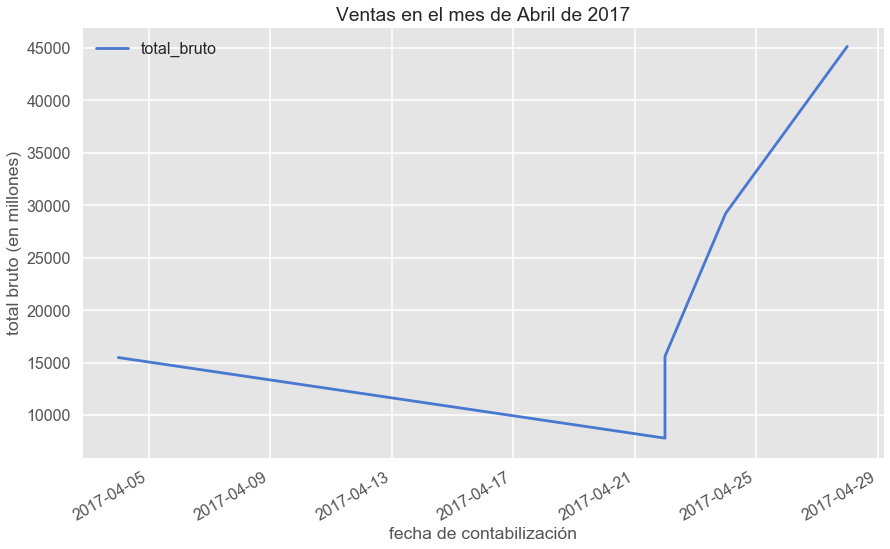

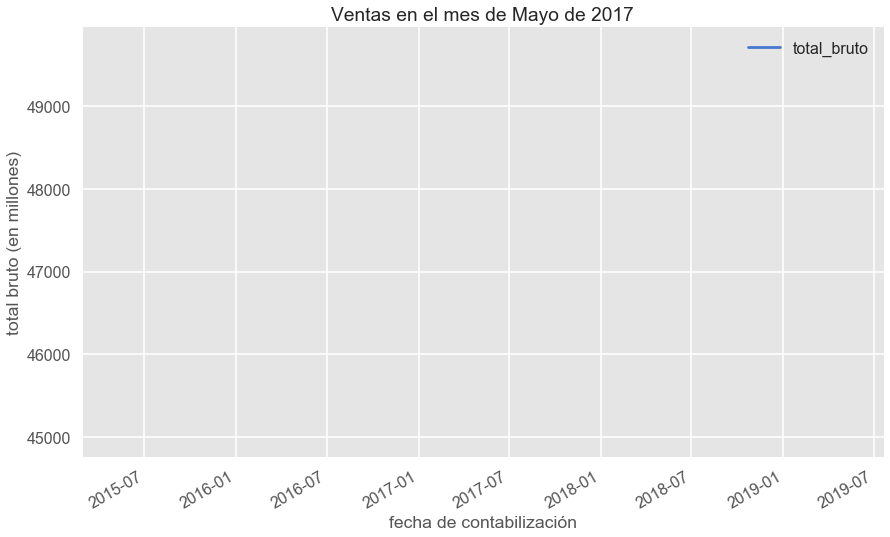

In [140]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')

def create_graphics(item):
    '''
    Creates the graphics per month of the given item.
    '''
    
    data_item = data.loc[data.descripcion_del_articulo == item,]
    months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 
             'Octrubre', 'Noviembre', 'Diciembre']
    
    # Graphisc for 2016
    for month in np.arange(1, 13):
        print(month)
        data_month = data_item.loc['2016-'+str(month)]
        data_month.plot(y='total_bruto')
        max = data_month.total_bruto.max()
        min = data_month.total_bruto.min()
        print('venta máxima: ', max, 'venta mínima: ', min)
        cols = ['vendedor', 'nombre_de_cliente_proveedor', 'total_bruto']
        print(data_month.loc[data_month.total_bruto == max, cols])
        print('\n')
        print(data_month.loc[data_month.total_bruto == min, cols])
        print('\n\n')

        locs, labels  = plt.yticks()
        title = plt.title('Ventas en el mes de ' + months[month - 1] + ' de 2016')
        _ = plt.xlabel('fecha de contabilización')
        _ = plt.ylabel('total bruto (en millones)')
        
        
    # Graphisc for 2017
    for month in np.arange(1, 6):
        print(month)
        data_month = data_item.loc['2017-'+str(month)]
        data_month.plot(y='total_bruto')
        max = data_month.total_bruto.max()
        min = data_month.total_bruto.min()
        print('venta máxima: ', max, 'venta mínima: ', min)
        cols = ['vendedor', 'nombre_de_cliente_proveedor', 'total_bruto']
        print(data_month.loc[data_month.total_bruto == max, cols])
        print('\n')
        print(data_month.loc[data_month.total_bruto == min, cols])
        print('\n\n')

        locs, labels  = plt.yticks()
        title = plt.title('Ventas en el mes de ' + months[month - 1] + ' de 2017')
        _ = plt.xlabel('fecha de contabilización')
        _ = plt.ylabel('total bruto (en millones)')

    
create_graphics('SODIO CLORURO 0,9 % SOLUCION INYECTABLE BOLSA PVC 500 ml (BAXTER)')
create_graphics('ACETAMINOFEN 500 mg TABLETA (AG)')
create_graphics('ACIDO ACETILSALICILICO 100 mg TABLETA (GENFAR)')
create_graphics('HIDROCLOROTIAZIDA 25 mg TABLETA (TECNOQUIMICAS)')
create_graphics('DICLOFENACO SÓDICO 75 mg/3 ml SOLUCION INYECTABLE (VITALIS)')